# Section: Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import IPython.core.display as di
from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 

In [3]:
# This text is used to hide the code cell when exported in html

di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

# Load dataset

In [5]:
df =  pd.read_csv('./2017/uk/data/cleaned_data.csv')

In [6]:
print('The total number of particants in this study: {}'.format(len(df)))

The total number of particants in this study: 253


To find the total number of participants, we took all submissions and then removed those from people who were outside the country (see question 1) and those from people who had not completed the first ten questions (i.e. those people who did not complete the first page of the survey). More details can be found [here](https://github.com/softwaresaved/survey_additional_analysis/blob/master/dropping_participants_process.ipynb).

# <span style ="color: green">Section 1. Social demographics</span>

In this section, we determine some information about the demographics of the respondents: gender, pay, educational level, age and ethnic origin. (These cover questions 1-5 and 54-58 in the survey.)

## Country of work (Q1)

The data was cleaned to remove all non-UK respondents.

In [7]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../survey_creation/2017/uk/listAnswers/countries.csv", "False", "./2017/uk/output/")

In [8]:
perc_to_count = get_percentage(v_to_count, filename)

In [9]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
In which country do you work?                   
United Kingdom                   253       100.0

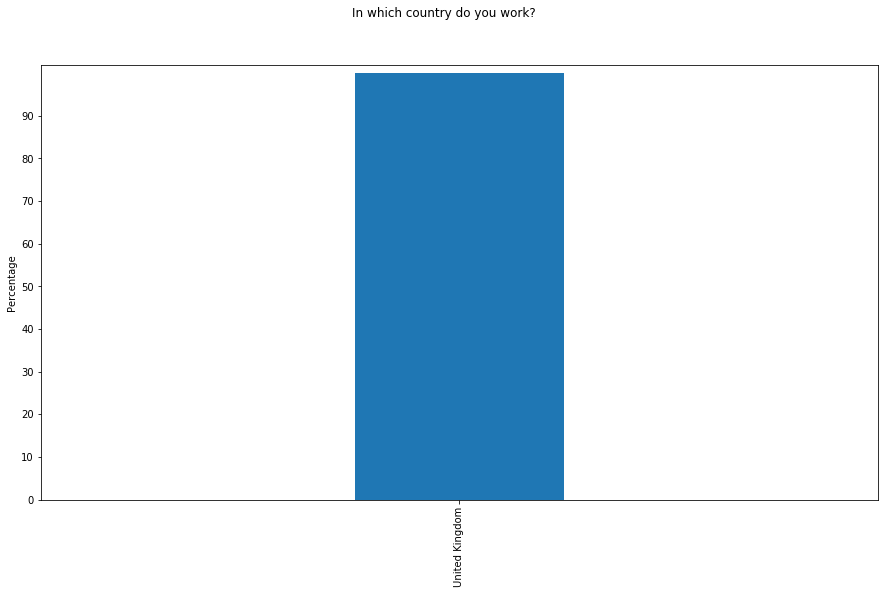

In [10]:
_ = get_plot(perc_to_count, "one choice")

## Qualifications (Q2 and Q3)

Most RSEs (67.19%) hold a PhD as their highest qualification and almost another quarter hold a Masters degree. Only 10% of RSEs hold an undergraduate degree as their highest qualification.

Most RSEs derive from a background in Computer Science (27%) and Physics and Astronomy (27%). There is a significant reduction in numbers in the next most popular background Mathematics (8%).

In [11]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest qualification you have obtained?'], "one choice", "./../survey_creation/2017/uk/listAnswers/education.csv", "False", "./2017/uk/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What is the highest qualification you have obta...                   
Doctorate                                             170        67.0
Master degree                                          56        22.0
Undergraduate degree                                   25        10.0
Other                                                   2         1.0

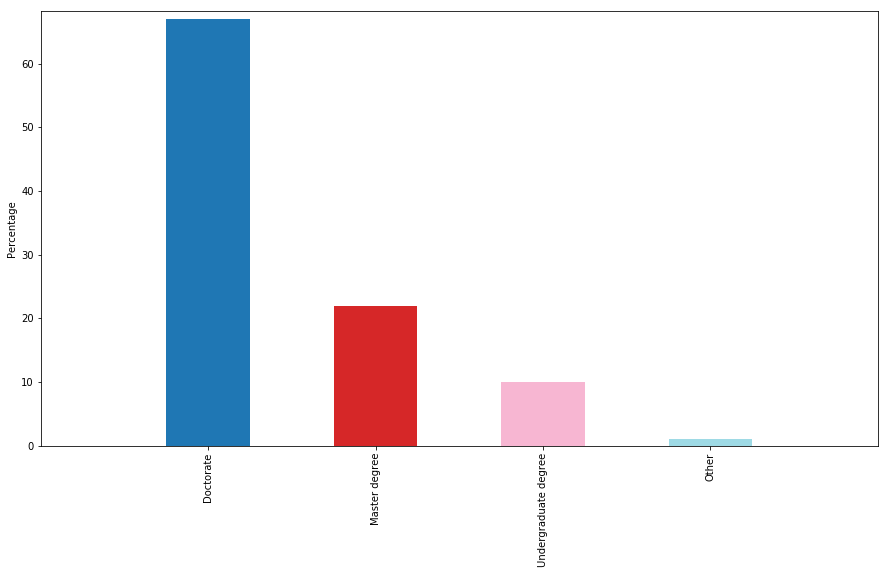

In [14]:
_ = get_plot(perc_to_count, "one choice")

## Field of qualification (Q3)

In [15]:
v_to_count, filename  = get_count(df, ['edu2. In which subject is your highest academic qualification?'], "one choice", "./../survey_creation/2017/uk/listAnswers/academic_field.csv", "False", "./2017/uk/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
In which subject is your highest academic quali...                   
Computer Science                                       69        27.0
Physics and Astronomy                                  69        27.0
Mathematics                                            19         8.0
Chemistry                                              16         6.0
Biological Sciences                                    15         6.0
Other                                                  12         5.0
Geography & Environmental Sciences                     10         4.0
Electrical & Electronic Engineering                     8         3.0
Civil Engineering                                       6         2.0
Mechanical Engineering                                  4         2.0
Psychology                                              3         1.0
General Engineering                                     3         1.0
Linguistics                                             3         1.0
Geology                                                 3         1.0
Materials Technology                                    3         1.0
Aeronautical & Manufacturing Engineering                2         1.0
Medicine                                                2         1.0
Robotics                                                1         0.0
Theology & Religious Studies                            1         0.0
History                                                 1         0.0
Art & Design                                            1         0.0
NaN                                                     2         NaN

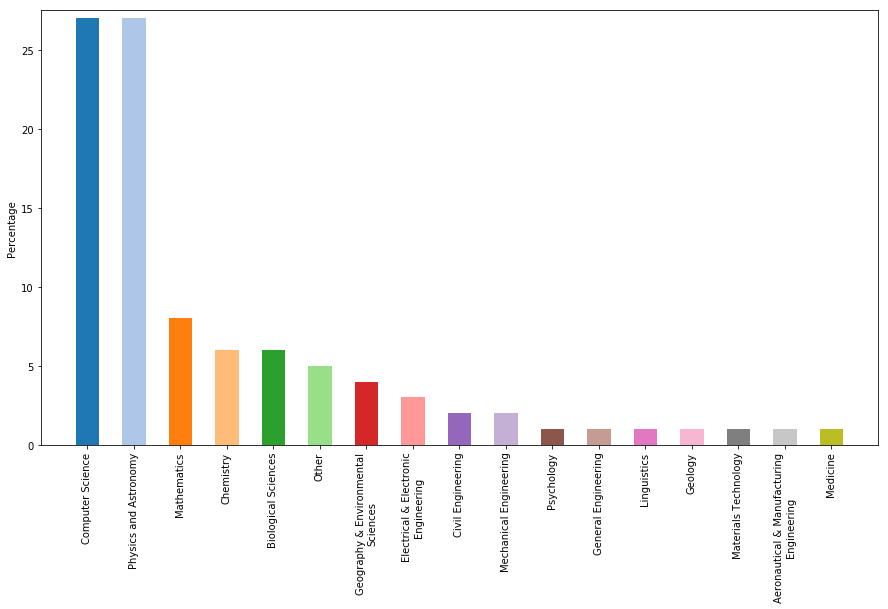

In [18]:
_ = get_plot(perc_to_count, "one choice")

## Gender (Q54)

In the 2016 UK survey of RSEs we found a significant gender imbalance in the RSE Community: of the respondents who provided answers (n=263), 88% were male, 11% female and less than 1% described their gender as "other". In the 2017 UK survey, we find that these figures are shifted slightly to 84% male, 15% female and less than 1% who describe their gender as "other". The RSE community in the UK is predominantly male.

In [19]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../survey_creation/2017/uk/listAnswers/gender.csv", "False", "./2017/uk/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select your gender                   
Male                         183        84.0
Female                        33        15.0
Other                          1         0.0
NaN                           36         NaN

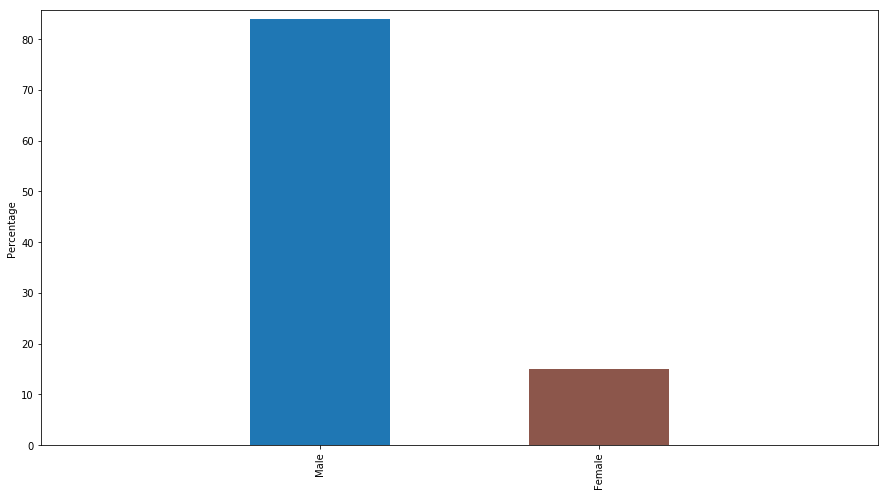

In [22]:
_ = get_plot(perc_to_count, "one choice")

## Age (Q55)

The majority of RSEs fall within the 25-44 years old age range, with the peak in the 35-44 years old age range. RSEs are younger than senior academics and less well distributed over age ranges than academics in general (see [HESA](https://www.hesa.ac.uk/news/26-02-2015/age-and-gender-of-staff) for details).

In [23]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "one choice", "./../survey_creation/2017/uk/listAnswers/age.csv", "True", "./2017/uk/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select your age                   
18 to 24 years              4         2.0
25 to 34 years             78        35.0
35 to 44 years             88        40.0
45 to 54 years             38        17.0
55 to 64 years             12         5.0
NaN                        33         NaN

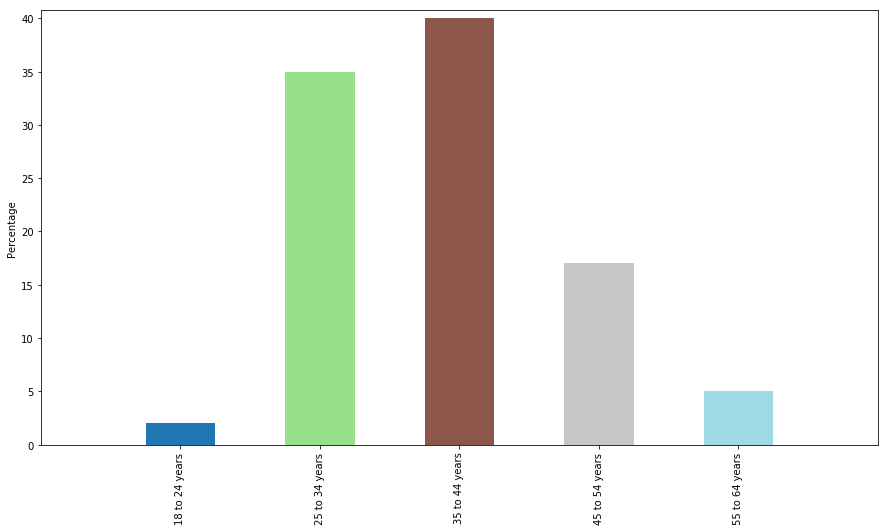

In [26]:
_ = get_plot(perc_to_count, "one choice")

## Salary (Q58)

Almost half of RSEs are paid in the range of £32,277-£43,325, and around a quarter are paid in the range of £43,325-£58,172. This is significantly different to academic staff, where around a third of academics are paid in range of £32,277-£43,325 and a third in the range of £43,325-£58,172 (see [HESA](https://www.hesa.ac.uk/data-and-analysis/publications/staff-2015-16/introduction)). 

In [27]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your salary'], "one choice", "./../survey_creation/2017/uk/listAnswers/salary.csv", "True", "./2017/uk/output/")

In [28]:
perc_to_count = get_percentage(v_to_count, filename)

In [29]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Please select the range of your salary                   
< £18,031                                   7         3.0
≥ £18,031 and < £24,057                     4         2.0
≥ £24,057 and < £32,277                    36        17.0
≥ £32,277 and < £43,325                    99        47.0
≥ £43,325 and < £58,172                    56        27.0
≥ £58,172                                   8         4.0
NaN                                        43         NaN

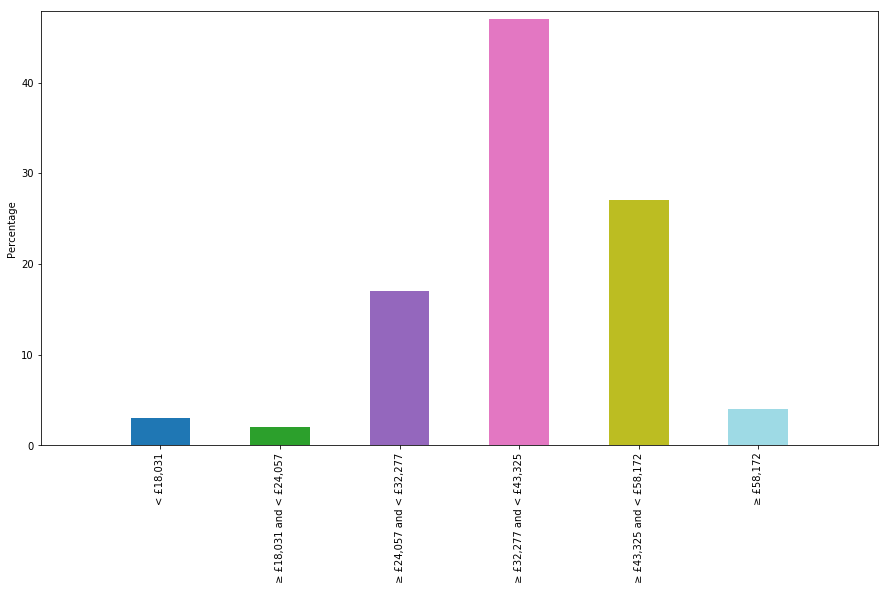

In [30]:
_ = get_plot(perc_to_count, "one choice")

## Ethnic origin (Q56)

RSEs are predominently white (91.9%) which is less diverse than England and Wales as a whole (86% white, see [Office of National Statistics](https://www.ons.gov.uk/peoplepopulationandcommunity/culturalidentity/ethnicity/articles/ethnicityandnationalidentityinenglandandwales/2012-12-11)), and indeed less diverse than the academic community in England, but similar to the ethnic range of Professors (see [HESA](https://www.hesa.ac.uk/news/01-03-2012/higher-education-staff)).

In [31]:
v_to_count, filename  = get_count(df, ['socio5. How would you describe your ethnic origin? This refers to people who share the same cultural background and identity, not country of birth or nationality.'], "one choice", "./../survey_creation/2017/uk/listAnswers/ethnicity.csv", "False", "./2017/uk/output/")

In [32]:
perc_to_count = get_percentage(v_to_count, filename)

In [33]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
How would you describe your ethnic origin? This...                   
White: English / Welsh / Scottish / Northern Ir...    136        65.0
White: Any other White background                      57        27.0
Asian / Asian British: Chinese                          5         2.0
Other Ethnic group: Any other ethnic group              3         1.0
White: Irish                                            3         1.0
Mixed / Multipe Ethnic groups: Any other Mixed ...      2         1.0
Black / African / Caribbean / Black Britsh:  Af...      2         1.0
Asian / Asian British: Indian                           1         0.0
Mixed / Multipe Ethnic groups: White and Black ...      1         0.0
NaN                                                    43         NaN

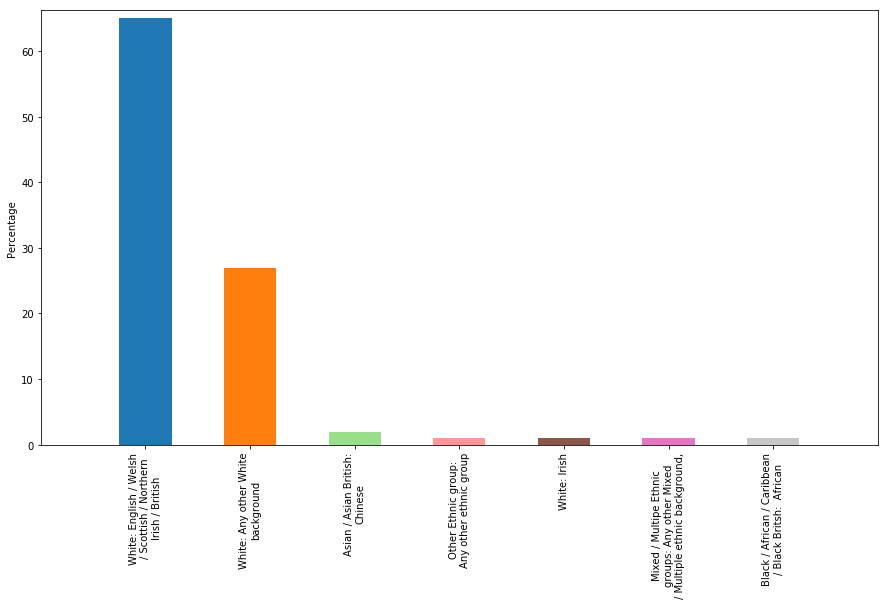

In [34]:
_ = get_plot(perc_to_count, "one choice")

## Disablity status (Q57)

RSEs who report a condition that is defined as a disability by the Equality Act 2010 make up 4.78% of the RSE community, which is in line with the number of academic staff who report a disability (4.00%).

In [35]:
v_to_count, filename  = get_count(df, ['disa1. Do you have a condition that is defined as a disability by the Equality Act 2010*'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [36]:
perc_to_count = get_percentage(v_to_count, filename)

In [37]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you have a condition that is defined as a di...           10         199   

                                                    NaN value  \
Do you have a condition that is defined as a di...         44   

                                                    Yes [Percentage]  \
Do you have a condition that is defined as a di...               5.0   

                                                    No [Percentage]  
Do you have a condition that is defined as a di...             95.0

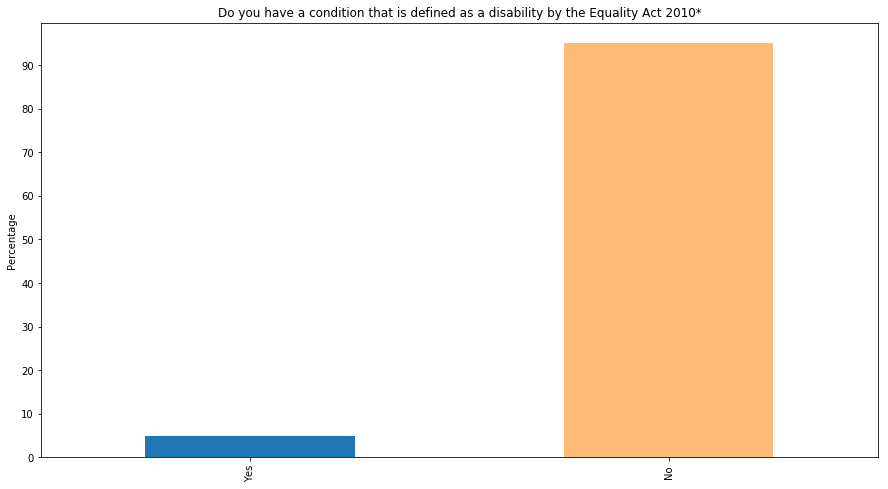

In [38]:
_ = get_plot(perc_to_count, "y/n/na")

## Professional qualifications (Q5)

The most popular professional qualifications are chartered engineer and chartered physicist.

In [39]:
 wc = wordcloud(df, ['edu4. Do you hold any professional qualifications?'])

(-0.5, 1499.5, 799.5, -0.5)

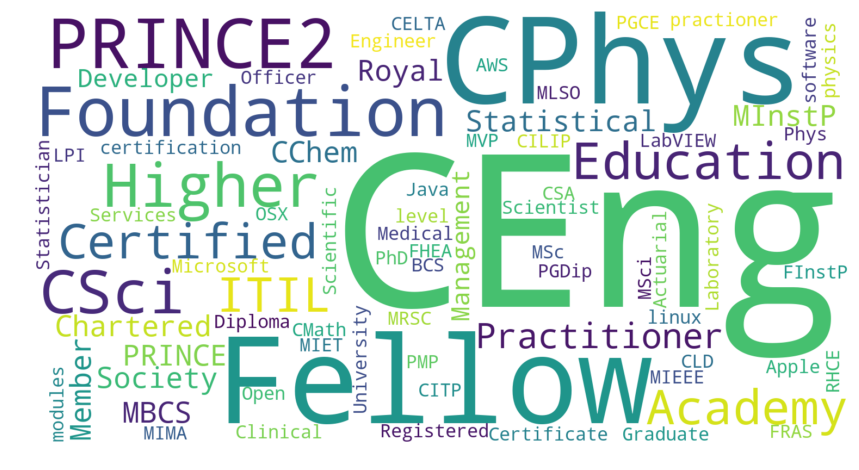

In [40]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# <span style ="color: green">Section 2. Questions about coding</span>

In this section we investigate the relationship between RSEs and the code they develop.

As expected, the vast majority of RSEs (97%) write code, but only around half of them consider themselves a "professional software developer" - despite the respondents having on average 13 years of software development experience. There is a marked and significant trend for code developed by RSEs to be used mainly used by other people.

Unsurprisingly, RSEs spend the majority of their time coding. The only other major call on their time is "research", so it would appear that their job title accurately describes their work. "Teaching" is the aspect of work with the least call on RSEs time: 43% of RSEs reported that they spent no time teaching.

## Do you write code as part of your job? (Q6)

In [41]:
v_to_count, filename  = get_count(df, ['rse1. Do you write code as part of your job?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [42]:
perc_to_count = get_percentage(v_to_count, filename)

In [43]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you write code as part of your job?          246           7   

                                        Yes [Percentage]  No [Percentage]  
Do you write code as part of your job?              97.0              3.0

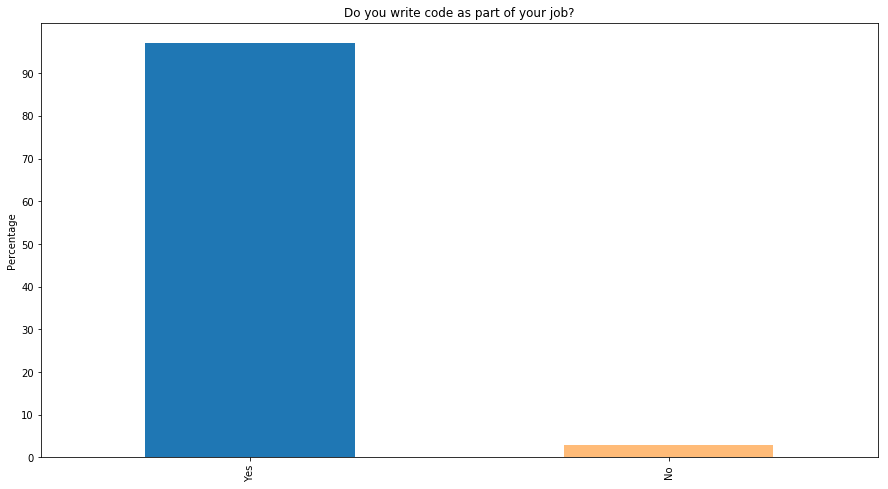

In [44]:
_ = get_plot(perc_to_count, "y/n/na")

## Who uses the code (Q7)?

In [45]:
v_to_count, filename  = get_count(df, ['rse3[SQ001]. Who uses the code that you write? []'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_usage_5.csv", "False", "./2017/uk/output/")

In [46]:
perc_to_count = get_percentage(v_to_count, filename)

In [47]:
display_side_by_side(v_to_count,perc_to_count)

0 - Mostly me [Count]  1 [Count]  \
Who uses the code that you write? []                      7         34   

                                      2 [Count]  3 [Count]  4 [Count]  \
Who uses the code that you write? []         31         38         60   

                                      5 - Mostly other people [Count]  \
Who uses the code that you write? []                               76   

                                      0 - Mostly me [Percentage]  \
Who uses the code that you write? []                         3.0   

                                      1 [Percentage]  2 [Percentage]  \
Who uses the code that you write? []            14.0            13.0   

                                      3 [Percentage]  4 [Percentage]  \
Who uses the code that you write? []            15.0            24.0   

                                      5 - Mostly other people [Percentage]  
Who uses the code that you write? []                                  31.0

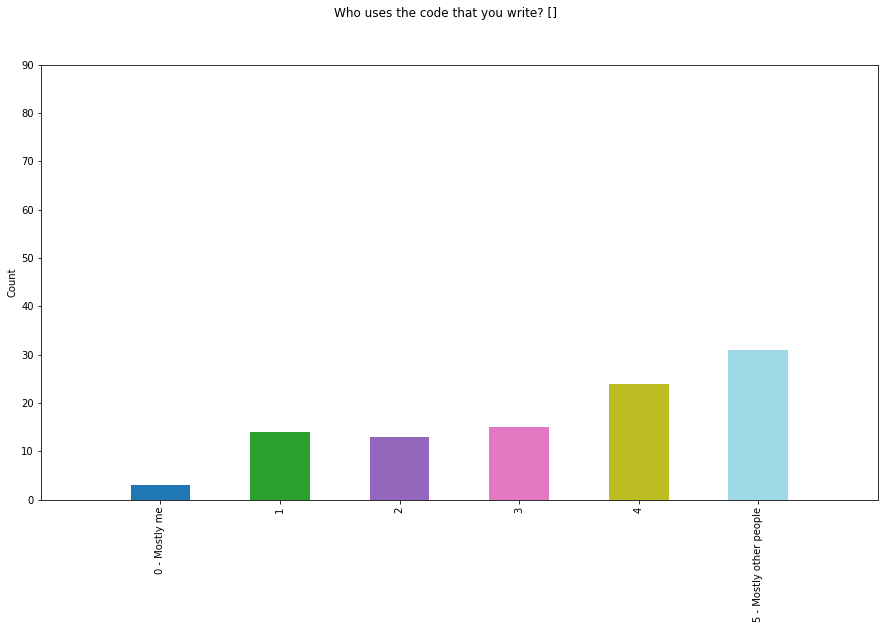

In [48]:
_ = get_plot(perc_to_count, "likert")

## Do you consider yourself a professional software developer? (Q8)

In [49]:
v_to_count, filename  = get_count(df, ['soft2can. Do you consider yourself a professional software developer?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [50]:
perc_to_count = get_percentage(v_to_count, filename)

In [51]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you consider yourself a professional softwar...          147         106   

                                                    Yes [Percentage]  \
Do you consider yourself a professional softwar...              58.0   

                                                    No [Percentage]  
Do you consider yourself a professional softwar...             42.0

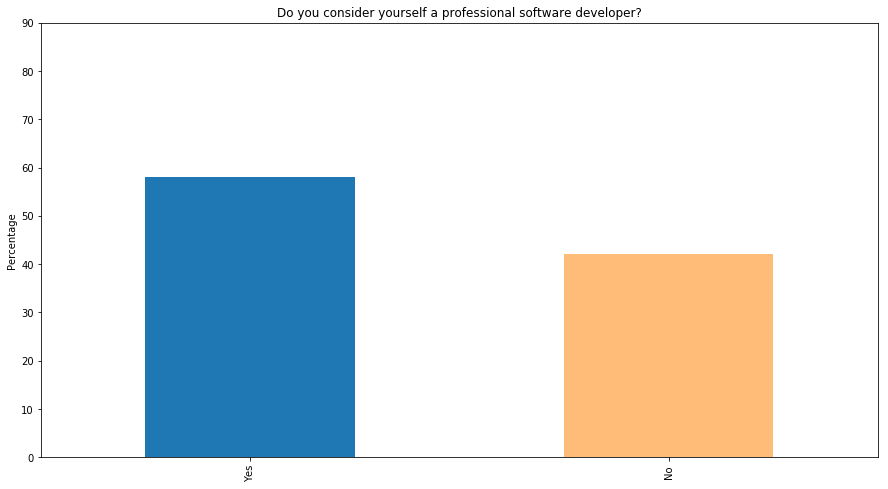

In [52]:
_ = get_plot(perc_to_count, "y/n/na")

### How many years of Software development experience do you have?

In [53]:
v_to_count, filename  = get_count(df, ['soft1can. How many years of software development experience do you have?'], "freenumeric", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

       How many years of software development experience do you have?
count                                         147.000000             
mean                                           13.707483             
std                                             7.823578             
min                                             1.000000             
25%                                             8.000000             
50%                                            12.000000             
75%                                            18.500000             
max                                            40.000000             


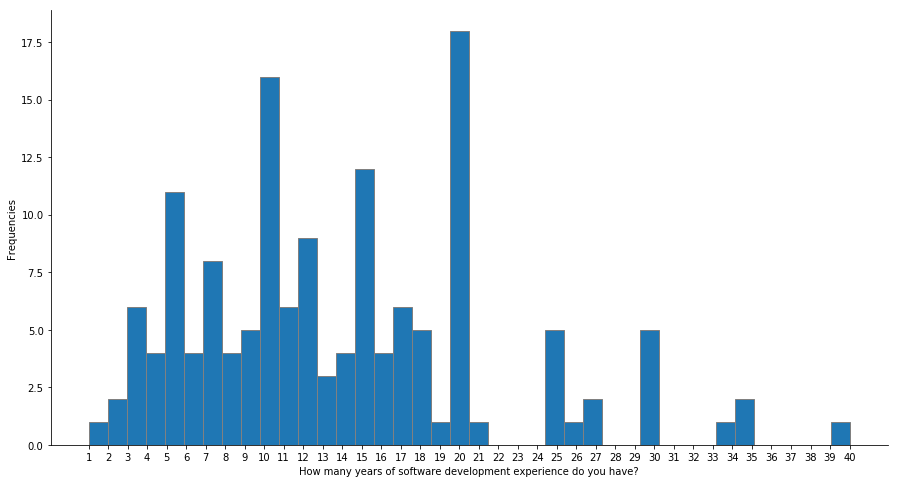

In [54]:
_ = get_plot(v_to_count, "freenumeric")

## In an average month, how much time do you spend on software development (Please rate your answer between 1 to 10. 1 Being none at all and 10 being All your time.) (Q10)

In [55]:
v_to_count, filename  = get_count(df, ['time1can[time1can]. In an average month, how much time do you spend on: [Software development]', 'time1can[time2can]. In an average month, how much time do you spend on: [Research]', 'time1can[time3can]. In an average month, how much time do you spend on: [People management]', 'time1can[time6can]. In an average month, how much time do you spend on: [Project management]', 'time1can[time4can]. In an average month, how much time do you spend on: [Teaching]', 'time1can[time5can]. In an average month, how much time do you spend on: [Other activities]'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_time_10.csv", "False", "./2017/uk/output/")

In [56]:
display(v_to_count) 

1 (None at all)     2     3     4     5     6     7  \
Software development              5.0  16.0  24.0  35.0  35.0  24.0  50.0   
Research                         45.0  58.0  37.0  29.0  25.0  20.0  20.0   
People management               102.0  76.0  33.0  16.0   6.0   7.0   7.0   
Project management               32.0  86.0  58.0  23.0  26.0  11.0   9.0   
Teaching                        109.0  77.0  33.0  17.0   6.0   8.0   1.0   
Other activities                 52.0  88.0  40.0  29.0  19.0  10.0  10.0   

                         8     9  10 (All my time)  
Software development  41.0  16.0               7.0  
Research              10.0   7.0               2.0  
People management      5.0   NaN               1.0  
Project management     4.0   2.0               2.0  
Teaching               NaN   1.0               1.0  
Other activities       NaN   3.0               2.0

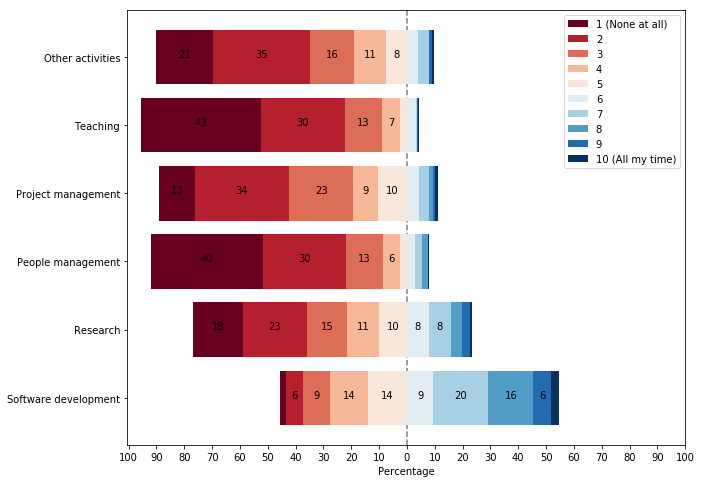

In [57]:
_ = get_plot(v_to_count, "likert")

# <span style ="color: green">Section 3: Questions about employment</span>

RSEs mainly work within universities: in total 66% work within a university. 51% of RSEs work in a university within an academic group (rather than in university within an IT service (8%) or HPC group (7%)). The other significant workplace for RSEs are the national laboratories where 16% of RSEs work.

Most respondents came from Russell Group universities: the top 13 universities where RSEs work are all within the Russell Group. 

### What type of organisation do you work for? (Q11)

In [58]:
v_to_count, filename  = get_count(df, ['currentEmp1. What type of organisation do you work for?'], "one choice", "./../survey_creation/2017/uk/listAnswers/type_organisation.csv", "False", "./2017/uk/output/")

In [59]:
perc_to_count = get_percentage(v_to_count, filename)

In [60]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What type of organisation do you work for?                   
University - within an academic group         128        51.0
National laboratory                            41        16.0
University - within an IT service              21         8.0
University - within an HPC group               18         7.0
Government                                     17         7.0
Other                                          13         5.0
Private company                                 8         3.0
NGO                                             7         3.0

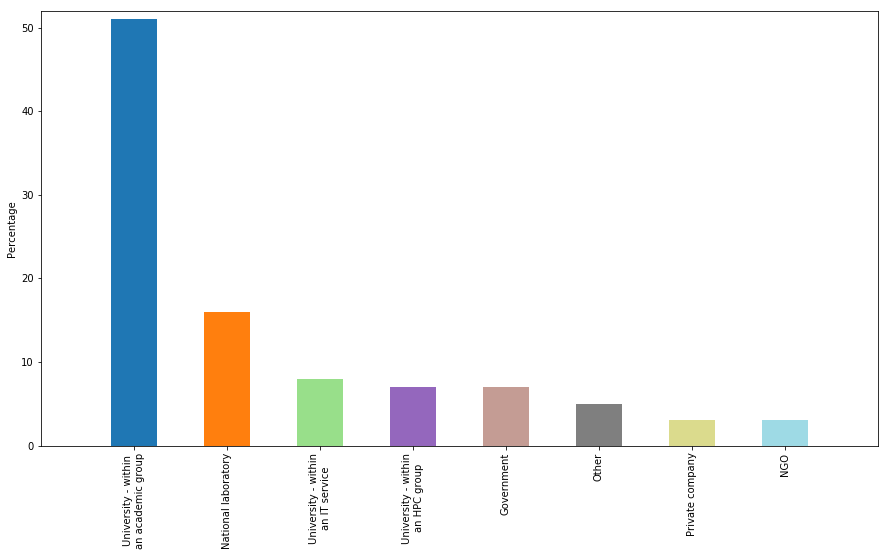

In [61]:
_ = get_plot(perc_to_count, "one choice")

### Which University?

In [62]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which university?'], "one choice", "./../survey_creation/2017/uk/listAnswers/universities.csv", "False", "./2017/uk/output/")

In [63]:
perc_to_count = get_percentage(v_to_count, filename)

In [64]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Which university?                                                    
University of Edinburgh                                23        14.0
University of Sheffield                                14         8.0
University of Manchester                               11         7.0
University of Oxford                                   11         7.0
University College London (UCL)                        11         7.0
University of St Andrews                               10         6.0
University of Cambridge                                 9         5.0
University of Southampton                               8         5.0
University of Bristol                                   7         4.0
University of Leeds                                     7         4.0
Imperial College London                                 6         4.0
University of Birmingham                                5         3.0
University of Warwick, Coventry                         4         2.0
University of Dundee                                    3         2.0
University of Reading                                   3         2.0
University of Bath                                      3         2.0
Newcastle University                                    3         2.0
Other                                                   2         1.0
University of Glasgow                                   2         1.0
University of Exeter                                    2         1.0
University of York                                      2         1.0
Durham University, Durham and Stockton-on-Tees ...      2         1.0
King's College London                                   2         1.0
Bournemouth University                                  2         1.0
Cranfield University, Cranfield, and Shrivenham         1         1.0
St George's, University of London                       1         1.0
Royal Veterinary College                                1         1.0
Queen Mary, University of London                        1         1.0
Birkbeck, University of London                          1         1.0
University of Nottingham                                1         1.0
University of Gloucestershire, Cheltenham, Glou...      1         1.0
Swansea University                                      1         1.0
Heriot-Watt University, Edinburgh and Galashiels        1         1.0
University of Sussex, Falmer and Brighton               1         1.0
University of Leicester                                 1         1.0
Bangor University                                       1         1.0
University of Liverpool                                 1         1.0
NaN                                                    88         NaN

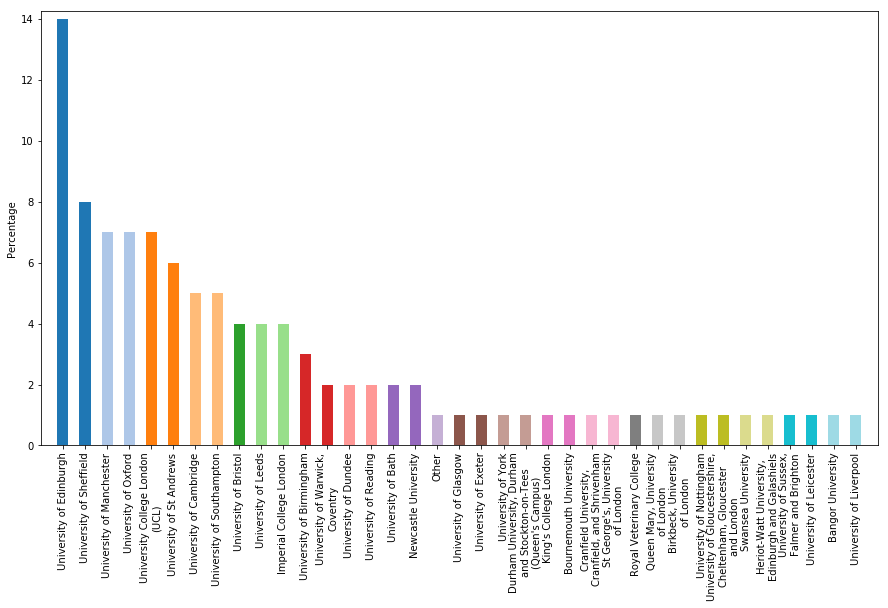

In [65]:
_ = get_plot(perc_to_count, "one choice")

### Which organisation do you work for?

In [66]:
 wc = wordcloud(df, ['currentEmp4. Which organisation do you work for?'])

(-0.5, 1499.5, 799.5, -0.5)

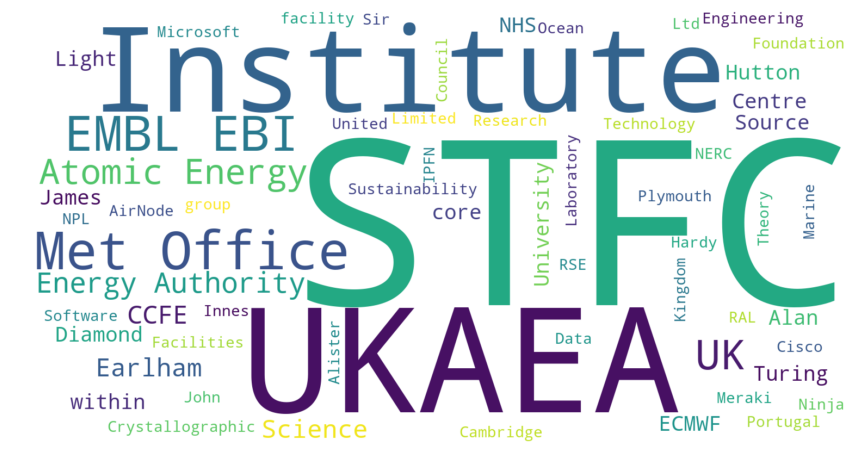

In [67]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### What is your official job title?

In [68]:
 wc = wordcloud(df, ['currentEmp5. What is your official job title'])

(-0.5, 1499.5, 799.5, -0.5)

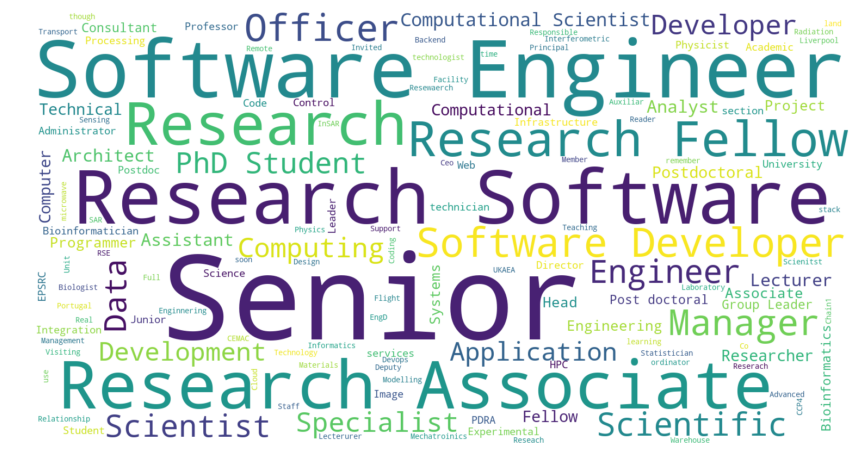

In [69]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Are you known by a different job title? If so, please enter the job title you use

In [70]:
 wc = wordcloud(df, ['currentEmp6. Are you known in your group by a different job title? If so, please enter the job title you use'])

(-0.5, 1499.5, 799.5, -0.5)

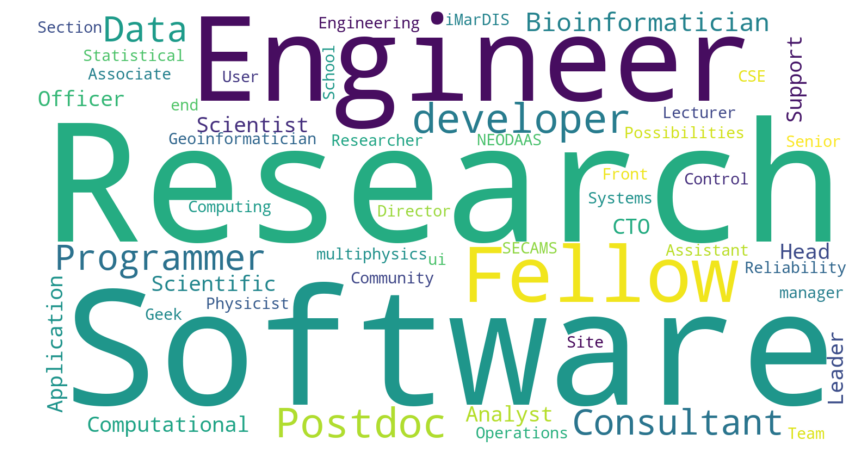

In [71]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### Do you work full time or part time

In [72]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time or part time?'], "one choice", "./../survey_creation/2017/uk/listAnswers/type_hours.csv", "False", "./2017/uk/output/")

In [73]:
perc_to_count = get_percentage(v_to_count, filename)

In [74]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Do you work full time or part time?                   
Full Time                              242        96.0
Part-time                               11         4.0

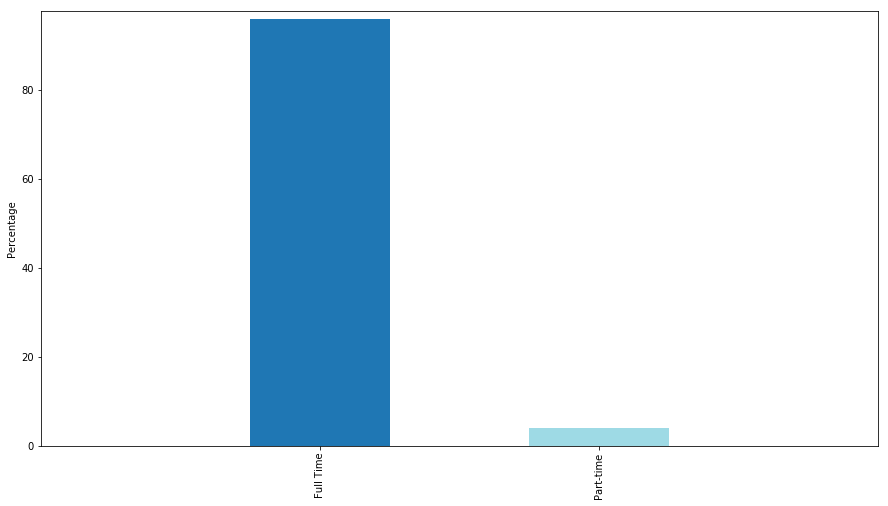

In [75]:
_ = get_plot(perc_to_count, "one choice")

### What type of contract are you employed on?

In [76]:
v_to_count, filename  = get_count(df, ['currentEmp10. What type of contract are you employed on?'], "one choice", "./../survey_creation/2017/uk/listAnswers/type_contract.csv", "False", "./2017/uk/output/")

In [77]:
perc_to_count = get_percentage(v_to_count, filename)

In [78]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What type of contract are you employed on?                       
Fixed term                                         92        36.0
Permanent -- funded by University core funding     77        30.0
Permanent -- as long as funding is available       65        26.0
Other/Not listed                                   15         6.0
Agency staff                                        3         1.0
Freelancer consultant contractor                    1         0.0

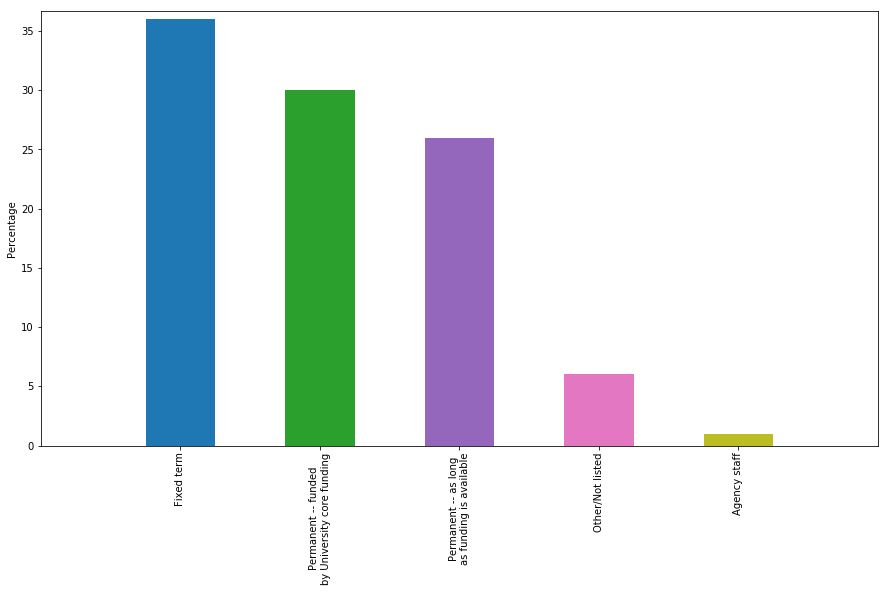

In [79]:
_ = get_plot(perc_to_count, "one choice")

### When did you start your current contract

### What is the duration of your current contract?

In [80]:
v_to_count, filename  = get_count(df, ['currentEmp11. What is the duration of your current contract in months?'], "freenumeric", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

       What is the duration of your current contract in months?
count                                          92.000000       
mean                                           31.385870       
std                                            15.376431       
min                                             1.500000       
25%                                            20.250000       
50%                                            36.000000       
75%                                            36.000000       
max                                            72.000000       


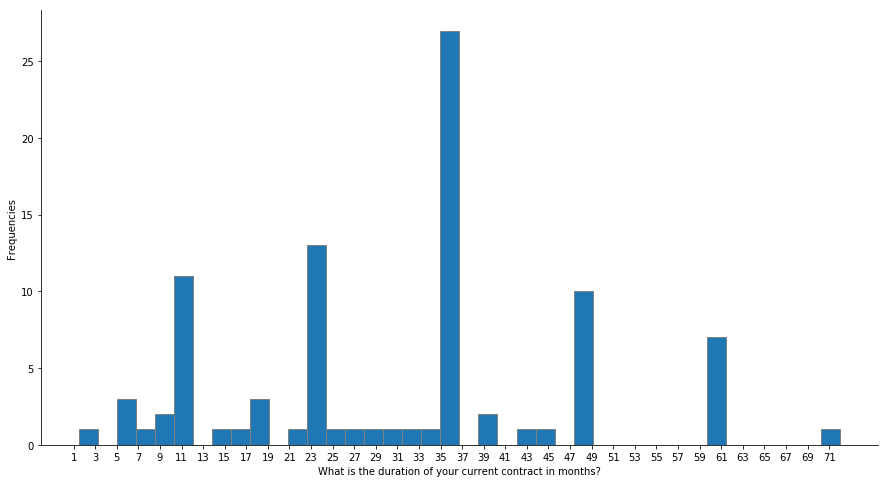

In [81]:
_ = get_plot(v_to_count, "freenumeric")

### In which disciplines do you work (select as many as apply)

In [82]:
v_to_count, filename  = get_count(df, ['currentEmp13[SQ001]. In which disciplines do you work (select as many as apply)? [Accounting & Finance]', 'currentEmp13[SQ002]. In which disciplines do you work (select as many as apply)? [Aeronautical & Manufacturing Engineering]', 'currentEmp13[SQ003]. In which disciplines do you work (select as many as apply)? [Agriculture & Forestry]', 'currentEmp13[SQ004]. In which disciplines do you work (select as many as apply)? [American Studies]', 'currentEmp13[SQ005]. In which disciplines do you work (select as many as apply)? [Anatomy & Physiology]', 'currentEmp13[SQ006]. In which disciplines do you work (select as many as apply)? [Anthropology]', 'currentEmp13[SQ007]. In which disciplines do you work (select as many as apply)? [Architecture]', 'currentEmp13[SQ008]. In which disciplines do you work (select as many as apply)? [Art & Design]', 'currentEmp13[SQ009]. In which disciplines do you work (select as many as apply)? [Biological Sciences]', 'currentEmp13[SQ010]. In which disciplines do you work (select as many as apply)? [Business & Management Studies]', 'currentEmp13[SQ011]. In which disciplines do you work (select as many as apply)? [Chemical Engineering]', 'currentEmp13[SQ012]. In which disciplines do you work (select as many as apply)? [Chemistry]', 'currentEmp13[SQ013]. In which disciplines do you work (select as many as apply)? [Civil Engineering]', 'currentEmp13[SQ014]. In which disciplines do you work (select as many as apply)? [Classics & Ancient History]', 'currentEmp13[SQ015]. In which disciplines do you work (select as many as apply)? [Communication & Media Studies]', 'currentEmp13[SQ016]. In which disciplines do you work (select as many as apply)? [Complementary Medicine]', 'currentEmp13[SQ017]. In which disciplines do you work (select as many as apply)? [Computer Science]', 'currentEmp13[SQ018]. In which disciplines do you work (select as many as apply)? [Counselling]', 'currentEmp13[SQ019]. In which disciplines do you work (select as many as apply)? [Criminology]', 'currentEmp13[SQ020]. In which disciplines do you work (select as many as apply)? [Dentistry]', 'currentEmp13[SQ021]. In which disciplines do you work (select as many as apply)? [East & South Asian Studies]', 'currentEmp13[SQ022]. In which disciplines do you work (select as many as apply)? [Economics]', 'currentEmp13[SQ023]. In which disciplines do you work (select as many as apply)? [Education]', 'currentEmp13[SQ024]. In which disciplines do you work (select as many as apply)? [Electrical & Electronic Engineering]', 'currentEmp13[SQ025]. In which disciplines do you work (select as many as apply)? [English]', 'currentEmp13[SQ026]. In which disciplines do you work (select as many as apply)? [Fashion]', 'currentEmp13[SQ027]. In which disciplines do you work (select as many as apply)? [Food Science]', 'currentEmp13[SQ028]. In which disciplines do you work (select as many as apply)? [French]', 'currentEmp13[SQ029]. In which disciplines do you work (select as many as apply)? [Geography & Environmental Sciences]', 'currentEmp13[SQ030]. In which disciplines do you work (select as many as apply)? [Geology]', 'currentEmp13[SQ031]. In which disciplines do you work (select as many as apply)? [General Engineering]', 'currentEmp13[SQ032]. In which disciplines do you work (select as many as apply)? [German]', 'currentEmp13[SQ033]. In which disciplines do you work (select as many as apply)? [History]', 'currentEmp13[SQ034]. In which disciplines do you work (select as many as apply)? [History of Art, Architecture & Design]', 'currentEmp13[SQ035]. In which disciplines do you work (select as many as apply)? [Hospitality, Leisure, Recreation & Tourism]', 'currentEmp13[SQ036]. In which disciplines do you work (select as many as apply)? [Iberian Languages/Hispanic Studies]', 'currentEmp13[SQ037]. In which disciplines do you work (select as many as apply)? [Land & Property Management]', 'currentEmp13[SQ038]. In which disciplines do you work (select as many as apply)? [Law]', 'currentEmp13[SQ039]. In which disciplines do you work (select as many as apply)? [Librarianship & Information Management]', 'currentEmp13[SQ040]. In which disciplines do you work (select as many as apply)? [Linguistics]', 'currentEmp13[SQ041]. In which disciplines do you work (select as many as apply)? [Marketing]', 'currentEmp13[SQ042]. In which disciplines do you work (select as many as apply)? [Materials Technology]', 'currentEmp13[SQ043]. In which disciplines do you work (select as many as apply)? [Mathematics]', 'currentEmp13[SQ044]. In which disciplines do you work (select as many as apply)? [Mechanical Engineering]', 'currentEmp13[SQ045]. In which disciplines do you work (select as many as apply)? [Medicine]', 'currentEmp13[SQ046]. In which disciplines do you work (select as many as apply)? [Middle Eastern and African Studies]', 'currentEmp13[SQ047]. In which disciplines do you work (select as many as apply)? [Music]', 'currentEmp13[SQ048]. In which disciplines do you work (select as many as apply)? [Nursing]', 'currentEmp13[SQ049]. In which disciplines do you work (select as many as apply)? [Ophthalmics]', 'currentEmp13[SQ050]. In which disciplines do you work (select as many as apply)? [Pharmacology & Pharmacy]', 'currentEmp13[SQ051]. In which disciplines do you work (select as many as apply)? [Philosophy]', 'currentEmp13[SQ052]. In which disciplines do you work (select as many as apply)? [Physics and Astronomy]', 'currentEmp13[SQ053]. In which disciplines do you work (select as many as apply)? [Physiotherapy]', 'currentEmp13[SQ054]. In which disciplines do you work (select as many as apply)? [Politics]', 'currentEmp13[SQ055]. In which disciplines do you work (select as many as apply)? [Psychology]', 'currentEmp13[SQ056]. In which disciplines do you work (select as many as apply)? [Robotics]', 'currentEmp13[SQ057]. In which disciplines do you work (select as many as apply)? [Russian & East European Languages]', 'currentEmp13[SQ058]. In which disciplines do you work (select as many as apply)? [Social Policy]', 'currentEmp13[SQ059]. In which disciplines do you work (select as many as apply)? [Social Work]', 'currentEmp13[SQ060]. In which disciplines do you work (select as many as apply)? [Sociology]', 'currentEmp13[SQ061]. In which disciplines do you work (select as many as apply)? [Sports Science]', 'currentEmp13[SQ062]. In which disciplines do you work (select as many as apply)? [Theology & Religious Studies]', 'currentEmp13[SQ063]. In which disciplines do you work (select as many as apply)? [Town & Country Planning and Landscape Design]', 'currentEmp13[SQ064]. In which disciplines do you work (select as many as apply)? [Veterinary Medicine]', 'currentEmp13[SQ065]. In which disciplines do you work (select as many as apply)? [Youth Work]'], "multiple choices", "./../survey_creation/2017/uk/listAnswers/academic_field.csv", "False", "./2017/uk/output/")

In [83]:
v_to_count

Count
Computer Science                                112
Biological Sciences                              87
Physics and Astronomy                            80
Mathematics                                      42
Chemistry                                        39
Medicine                                         37
Geography & Environmental Sciences               34
Electrical & Electronic Engineering              25
Mechanical Engineering                           24
General Engineering                              20
Materials Technology                             17
Education                                        15
Psychology                                       12
Chemical Engineering                             12
Civil Engineering                                12
Aeronautical & Manufacturing Engineering         11
Geology                                          11
Linguistics                                      11
Anatomy & Physiology                             11
Librarianship & Information Management            9
Robotics                                          9
History                                           8
Architecture                                      8
Sociology                                         8
Economics                                         8
Classics & Ancient History                        7
Social Policy                                     7
Business & Management Studies                     7
Pharmacology & Pharmacy                           6
Agriculture & Forestry                            6
Middle Eastern and African Studies                5
Anthropology                                      5
Ophthalmics                                       4
Food Science                                      4
Theology & Religious Studies                      4
Town & Country Planning and Landscape Design      4
Communication & Media Studies                     4
Art & Design                                      4
History of Art, Architecture & Design             3
Law                                               3
Nursing                                           3
Politics                                          2
Land & Property Management                        2
Philosophy                                        2
English                                           2
Physiotherapy                                     1
Social Work                                       1
Sports Science                                    1
Veterinary Medicine                               1
Youth Work                                        1
Music                                             1
Marketing                                         1
Iberian Languages/Hispanic Studies                1
Hospitality, Leisure, Recreation & Tourism        1
German                                            1
French                                            1
Fashion                                           1
East & South Asian Studies                        1
Dentistry                                         1
Criminology                                       1
Counselling                                       1
Complementary Medicine                            1
American Studies                                  1
Russian & East European Languages                 0
Accounting & Finance                              0

In [84]:
perc_to_count = get_percentage(v_to_count, filename)

In [85]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                               
Computer Science                                112        15.0
Biological Sciences                              87        11.0
Physics and Astronomy                            80        10.0
Mathematics                                      42         6.0
Chemistry                                        39         5.0
Medicine                                         37         5.0
Geography & Environmental Sciences               34         4.0
Electrical & Electronic Engineering              25         3.0
Mechanical Engineering                           24         3.0
General Engineering                              20         3.0
Materials Technology                             17         2.0
Education                                        15         2.0
Psychology                                       12         2.0
Chemical Engineering                             12         2.0
Civil Engineering                                12         2.0
Aeronautical & Manufacturing Engineering         11         1.0
Geology                                          11         1.0
Linguistics                                      11         1.0
Anatomy & Physiology                             11         1.0
Librarianship & Information Management            9         1.0
Robotics                                          9         1.0
History                                           8         1.0
Architecture                                      8         1.0
Sociology                                         8         1.0
Economics                                         8         1.0
Classics & Ancient History                        7         1.0
Social Policy                                     7         1.0
Business & Management Studies                     7         1.0
Pharmacology & Pharmacy                           6         1.0
Agriculture & Forestry                            6         1.0
Middle Eastern and African Studies                5         1.0
Anthropology                                      5         1.0
Ophthalmics                                       4         1.0
Food Science                                      4         1.0
Theology & Religious Studies                      4         1.0
Town & Country Planning and Landscape Design      4         1.0
Communication & Media Studies                     4         1.0
Art & Design                                      4         1.0
History of Art, Architecture & Design             3         0.0
Law                                               3         0.0
Nursing                                           3         0.0
Politics                                          2         0.0
Land & Property Management                        2         0.0
Philosophy                                        2         0.0
English                                           2         0.0
Physiotherapy                                     1         0.0
Social Work                                       1         0.0
Sports Science                                    1         0.0
Veterinary Medicine                               1         0.0
Youth Work                                        1         0.0
Music                                             1         0.0
Marketing                                         1         0.0
Iberian Languages/Hispanic Studies                1         0.0
Hospitality, Leisure, Recreation & Tourism        1         0.0
German                                            1         0.0
French                                            1         0.0
Fashion                                           1         0.0
East & South Asian Studies                        1         0.0
Dentistry                                         1         0.0
Criminology                                       1         0.0
Counselling                                       1         0.0
Complementary 

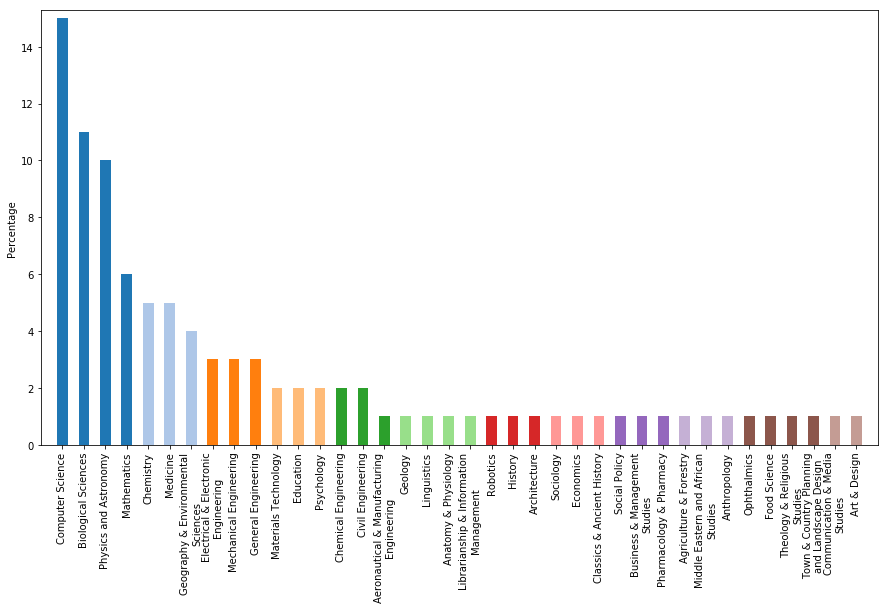

In [86]:
_ = get_plot(perc_to_count, "multiple choices")

# Section: 3

## Group of question: prevEmp

### Where was your previous job based?

In [87]:
v_to_count, filename  = get_count(df, ['prevEmp1. Where was your previous job based?'], "one choice", "./../survey_creation/2017/uk/listAnswers/previous_job.csv", "False", "./2017/uk/output/")

In [88]:
perc_to_count = get_percentage(v_to_count, filename)

In [89]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Where was your previous job based?                   
University                            121        49.0
Private company                        64        26.0
This is my first job                   27        11.0
National laboratory                    16         6.0
Government                              8         3.0
Other                                   8         3.0
NGO                                     2         1.0
NaN                                     7         NaN

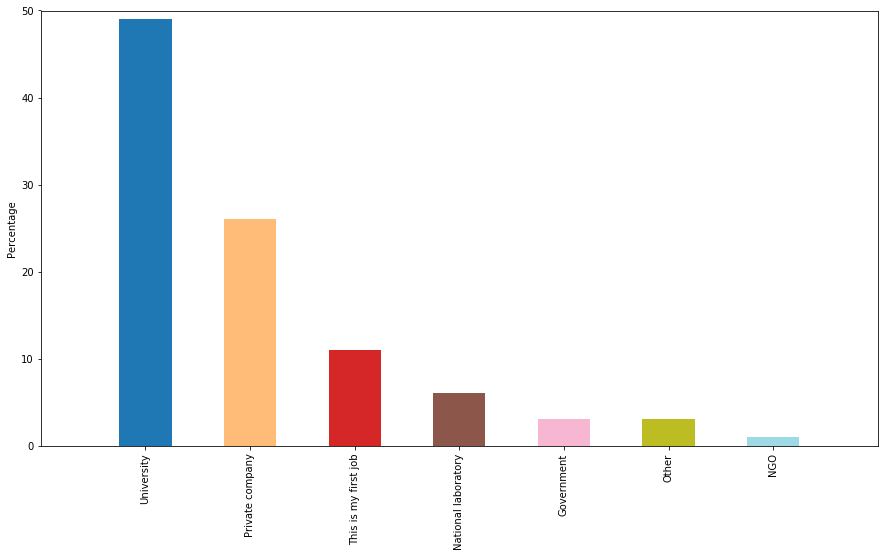

In [90]:
_ = get_plot(perc_to_count, "one choice")

### Rank the following factors dependent on how strongly they influenced your decision to accept your current position

In [91]:
v_to_count, filename  = get_count(df, ['prevEmp2[1]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 1]', 'prevEmp2[2]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 2]', 'prevEmp2[3]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 3]', 'prevEmp2[4]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 4]', 'prevEmp2[5]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 5]', 'prevEmp2[6]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 6]', 'prevEmp2[7]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 7]', 'prevEmp2[8]. Rank the following factors dependent on how strongly they influenced your decision to accept your current position [Rank 8]'], "ranking", "./../survey_creation/2017/uk/listAnswers/reason_leave_job.csv", "False", "./2017/uk/output/")

In [92]:
perc_to_count = get_percentage(v_to_count, filename)

In [93]:
display_side_by_side(v_to_count,perc_to_count)

Rank 1 [Count]  Rank 2 [Count]  \
Desire to work in a research environment              55              39   
Desire to advance research                            38              38   
Opportunity to develop software                       32              33   
I want to learn new skills                            27              28   
Freedom to choose own working practices               23              19   
Opportunity for career advancement                    20              23   
Ability to work across disciplines                    15              31   
Flexible working hours                                14              14   
The salary                                             9               5   
NaN                                                   20              23   

                                          Rank 3 [Count]  Rank 4 [Count]  \
Desire to work in a research environment              38              30   
Desire to advance research                            41              21   
Opportunity to develop software                       26              25   
I want to learn new skills                            23              31   
Freedom to choose own working practices               28              22   
Opportunity for career advancement                    16              14   
Ability to work across disciplines                    27              21   
Flexible working hours                                13              27   
The salary                                             9              15   
NaN                                                   32              47   

                                          Rank 5 [Count]  Rank 6 [Count]  \
Desire to work in a research environment              15               6   
Desire to advance research                            24              15   
Opportunity to develop software                       24              10   
I want to learn new skills                            23              20   
Freedom to choose own working practices               21              18   
Opportunity for career advancement                    14              18   
Ability to work across disciplines                    17              21   
Flexible working hours                                23              19   
The salary                                            13              16   
NaN                                                   79             110   

                                          Rank 7 [Count]  Rank 8 [Count]  \
Desire to work in a research environment               5             2.0   
Desire to advance research                             9             NaN   
Opportunity to develop software                       12            10.0   
I want to learn new skills                            11             6.0   
Freedom to choose own working practices               20             6.0   
Opportunity for career advancement                    16            17.0   
Ability to work across disciplines                     6             8.0   
Flexible working hours                                16            23.0   
The salary                                            27            20.0   
NaN                                                  131           161.0   

                                          Rank 1 [Percentage]  \
Desire to work in a research environment                 29.0   
Desire to advance research                               20.0   
Opportunity to develop software                          19.0   
I want to learn new skills                               16.0   
Freedom to choose own working practices                  15.0   
Opportunity for career advancement                       14.0   
Ability to work across disciplines                       10.0   
Flexible working hours                                    9.0   
The salary                                                8.0   
NaN                                         

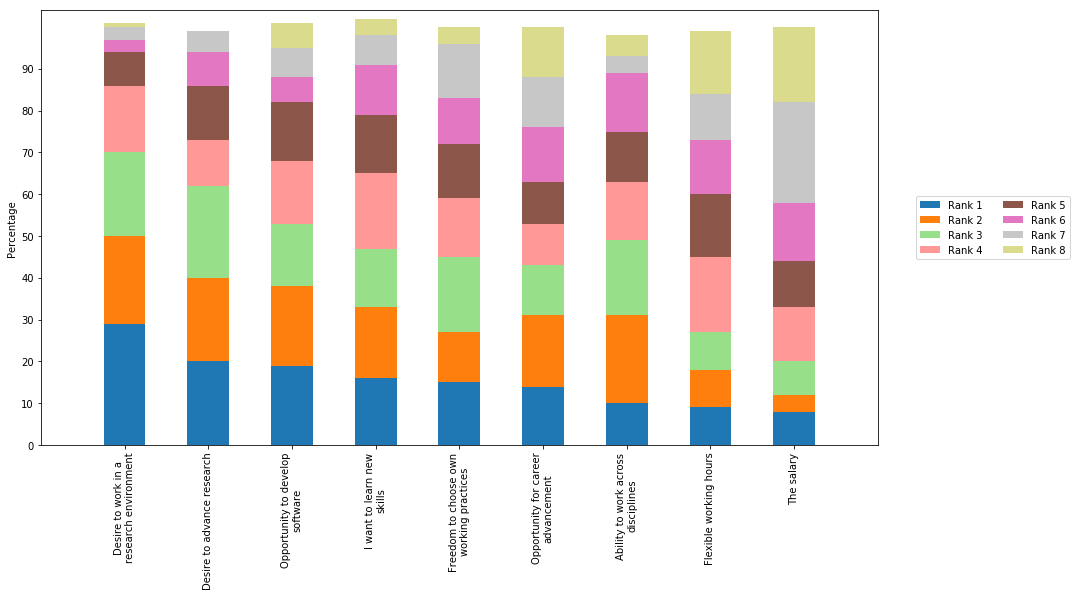

In [94]:
_ = get_plot(perc_to_count, "ranking")

# Section: 4

## Group of question: currentWork

### Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?

In [95]:
v_to_count, filename  = get_count(df, ['currentWork1. Do you always work with the same researcher(s), or do you regularly change the researcher(s) you work with?'], "one choice", "./../survey_creation/2017/uk/listAnswers/work_researchers.csv", "False", "./2017/uk/output/")

In [96]:
perc_to_count = get_percentage(v_to_count, filename)

In [97]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
Do you always work with the same researcher(s),...                   
Regularly change researcher(s)                        122        52.0
Same researcher(s)                                    113        48.0
NaN                                                    18         NaN

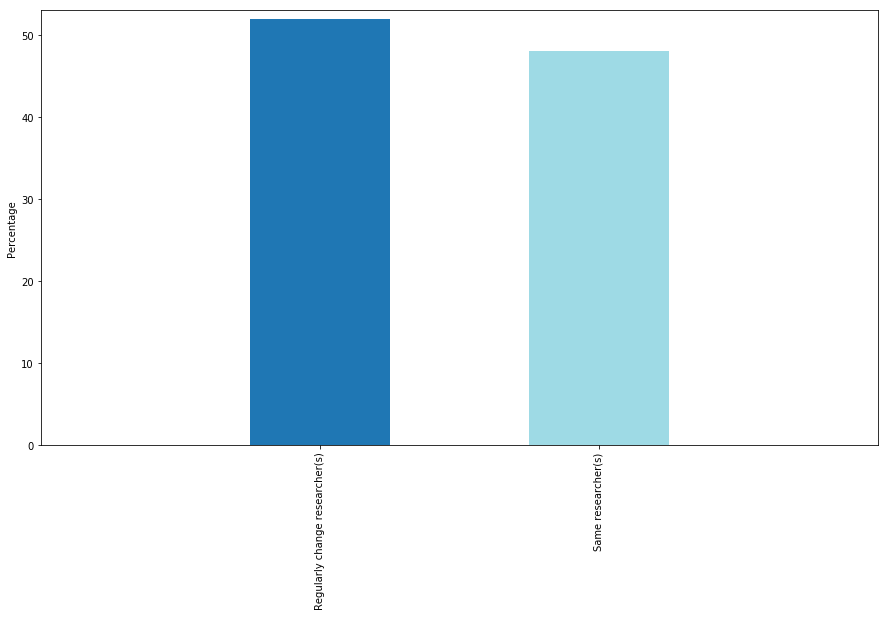

In [98]:
_ = get_plot(perc_to_count, "one choice")

### Do you work for a Research Software Group?

In [99]:
v_to_count, filename  = get_count(df, ['currentWork2. Do you work for a Research Software Group?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [100]:
perc_to_count = get_percentage(v_to_count, filename)

In [101]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you work for a Research Software Group?           59          58   

                                            NaN value  Yes [Percentage]  \
Do you work for a Research Software Group?        136              50.0   

                                            No [Percentage]  
Do you work for a Research Software Group?             50.0

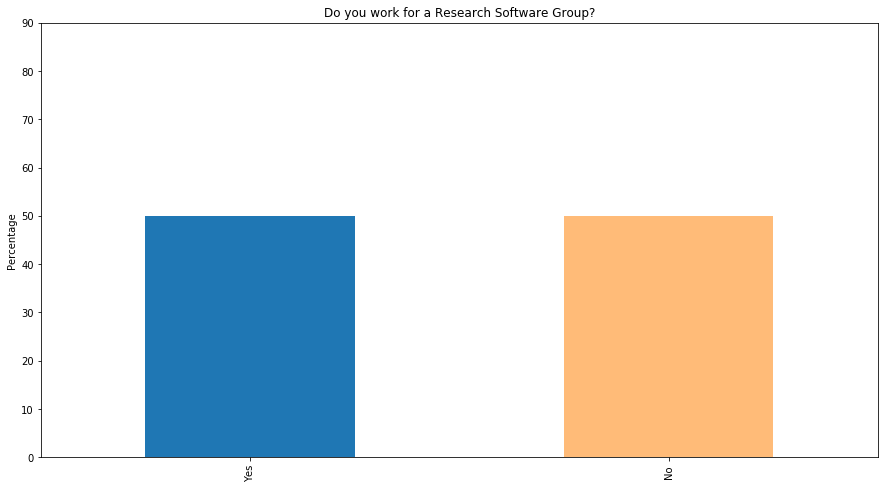

In [102]:
_ = get_plot(perc_to_count, "y/n/na")

## Group of question: paper

### Has your software contributed to research that has been published in a journal or at a conference?; In general, when your software contributes to a paper, are you acknowledged in that paper?; Are you generally named as the main author of the paper?; Are you generally named as a co-author of the paper?; Are you generally acknowledged in the main text of the paper?

In [103]:
v_to_count, filename  = get_count(df, ['paper1. Has your software contributed to research that has been published in a journal or at a conference?', 'paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?', 'paper3. Are you generally named as the main author of the paper?', 'paper4. Are you generally named as a co-author of the paper?', 'paper5. Are you generally acknowledged in the main text of the paper?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [104]:
perc_to_count = get_percentage(v_to_count, filename)

In [105]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
paper1. Has your software contributed to resear...          199          20   
paper2. In general, when your software contribu...          139          40   
paper3. Are you generally named as the main aut...           49          86   
paper4. Are you generally named as a co-author ...           76          12   
paper5. Are you generally acknowledged in the m...           11           1   

                                                    NaN value  \
paper1. Has your software contributed to resear...         34   
paper2. In general, when your software contribu...         74   
paper3. Are you generally named as the main aut...        118   
paper4. Are you generally named as a co-author ...        165   
paper5. Are you generally acknowledged in the m...        241   

                                                    Yes [Percentage]  \
paper1. Has your software contributed to resear...              91.0   
paper2. In general, when your software contribu...              78.0   
paper3. Are you generally named as the main aut...              36.0   
paper4. Are you generally named as a co-author ...              86.0   
paper5. Are you generally acknowledged in the m...              92.0   

                                                    No [Percentage]  
paper1. Has your software contributed to resear...              9.0  
paper2. In general, when your software contribu...             22.0  
paper3. Are you generally named as the main aut...             64.0  
paper4. Are you generally named as a co-author ...             14.0  
paper5. Are you generally acknowledged in the m...              8.0

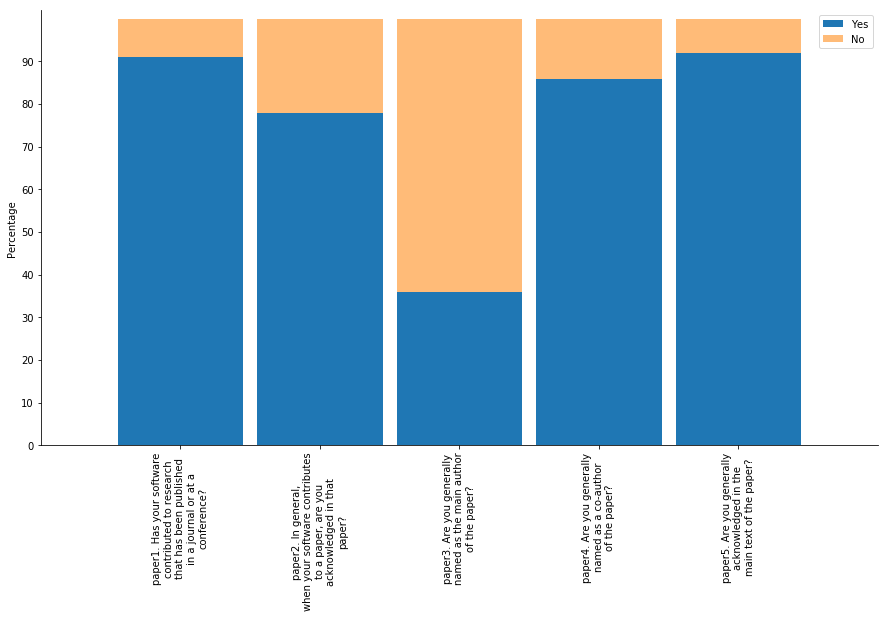

In [106]:
_ = get_plot(perc_to_count, "y/n/na")

## Group of question: conf

### Have you ever presented your software work at a conference or workshop?

In [107]:
v_to_count, filename  = get_count(df, ['conf1can. Have you ever presented your software work at a conference or workshop?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [108]:
perc_to_count = get_percentage(v_to_count, filename)

In [109]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever presented your software work at a...          134         101   

                                                    NaN value  \
Have you ever presented your software work at a...         18   

                                                    Yes [Percentage]  \
Have you ever presented your software work at a...              57.0   

                                                    No [Percentage]  
Have you ever presented your software work at a...             43.0

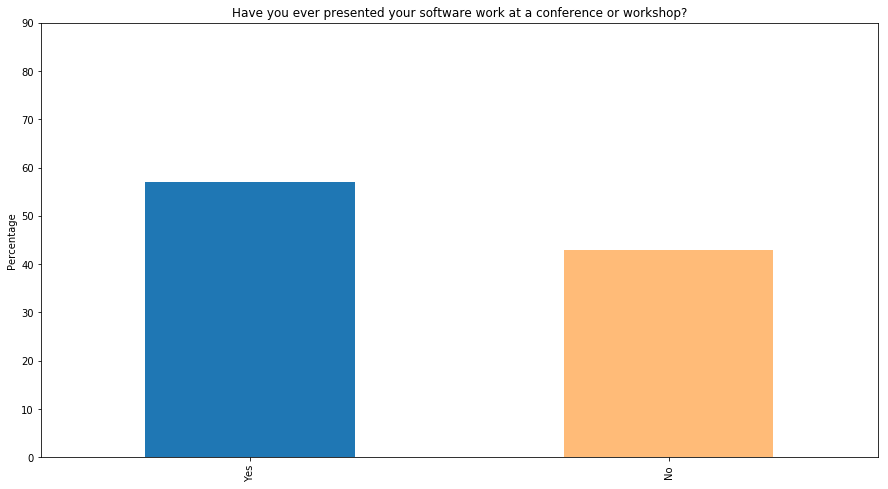

In [110]:
_ = get_plot(perc_to_count, "y/n/na")

### Which conference(s)/workshop(s)

In [111]:
 wc = wordcloud(df, ['conf2can. Which conferences or workshops?'])

(-0.5, 1499.5, 799.5, -0.5)

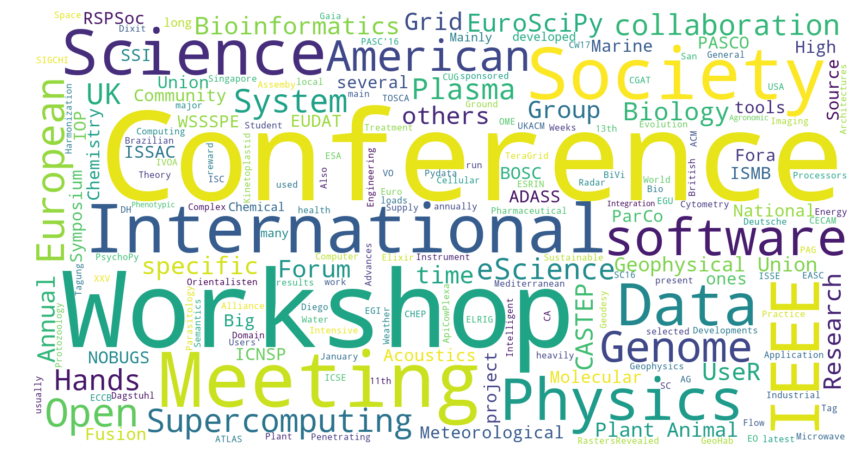

In [112]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

## Group of question: proj

### How many software projects are you currently involved in?

In [113]:
v_to_count, filename  = get_count(df, ['proj1can. How many software projects are you currently involved with?'], "freenumeric", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

       How many software projects are you currently involved with?
count                                         222.000000          
mean                                            3.959459          
std                                             4.226952          
min                                             0.000000          
25%                                             2.000000          
50%                                             3.000000          
75%                                             5.000000          
max                                            50.000000          


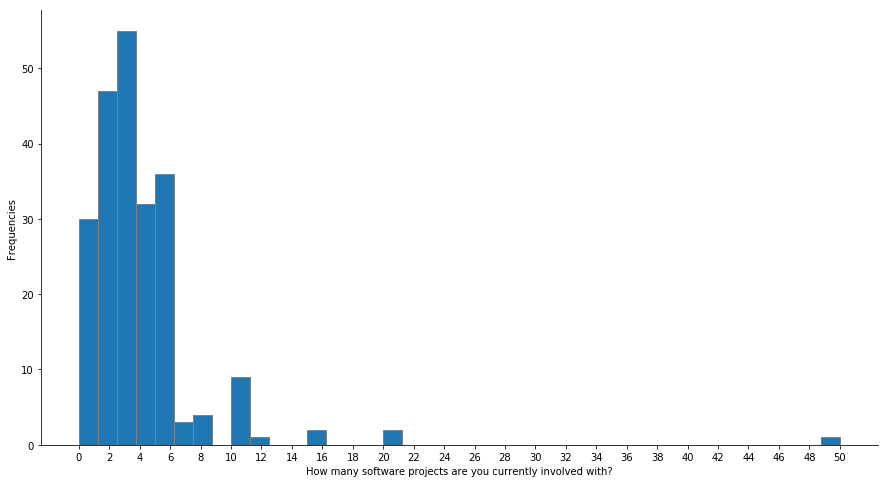

In [114]:
_ = get_plot(v_to_count, "freenumeric")

### In general, what sort of testing do you conduct on your software? (check all that apply)

In [115]:
v_to_count, filename  = get_count(df, ['proj4can[SQ001]. In general, what sort of testing do you conduct on your software? (check all that apply) [No formal testing]', 'proj4can[SQ002]. In general, what sort of testing do you conduct on your software? (check all that apply) [Developers conduct testing]', 'proj4can[SQ003]. In general, what sort of testing do you conduct on your software? (check all that apply) [Test engineers conduct testing]', 'proj4can[SQ004]. In general, what sort of testing do you conduct on your software? (check all that apply) [Users conduct testing]'], "multiple choices", "./../survey_creation/2017/uk/listAnswers/testing.csv", "False", "./2017/uk/output/")

In [116]:
perc_to_count = get_percentage(v_to_count, filename)

In [117]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                 
Developers conduct testing        202        57.0
Users conduct testing              99        28.0
No formal testing                  37        10.0
Test engineers conduct testing     18         5.0

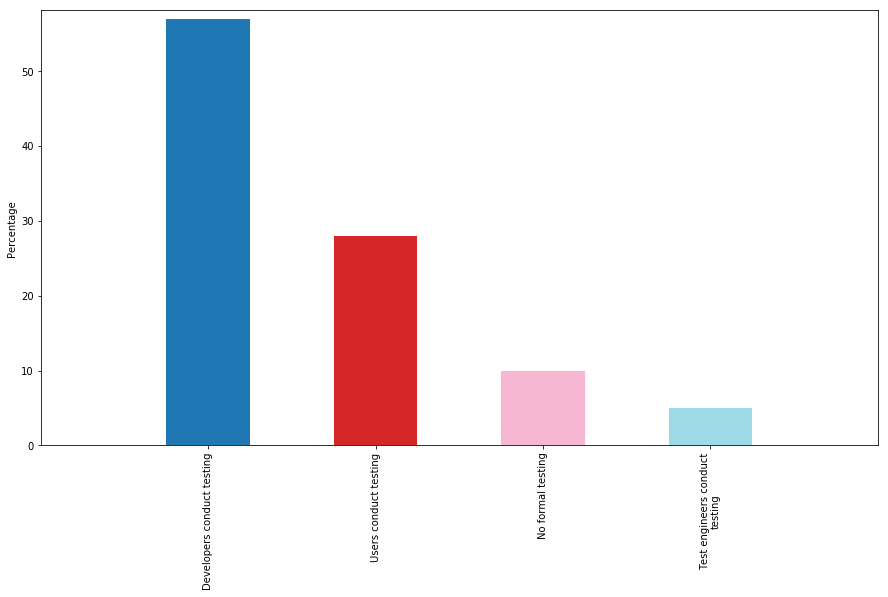

In [118]:
_ = get_plot(perc_to_count, "multiple choices")

## Group of question: stability

### What is the bus factor of your most important software project?

In [119]:
v_to_count, filename  = get_count(df, ['stability1. What is the bus factor of your most important software project?'], "likert", "./../survey_creation/2017/uk/listAnswers/bus_factor.csv", "False", "./2017/uk/output/")

In [120]:
perc_to_count = get_percentage(v_to_count, filename)

In [121]:
display_side_by_side(v_to_count,perc_to_count)

1 [Count]  2 [Count]  \
What is the bus factor of your most important s...         99         72   

                                                    3 [Count]  4 [Count]  \
What is the bus factor of your most important s...         29          8   

                                                    5+ [Count]  \
What is the bus factor of your most important s...          25   

                                                    1 [Percentage]  \
What is the bus factor of your most important s...            42.0   

                                                    2 [Percentage]  \
What is the bus factor of your most important s...            31.0   

                                                    3 [Percentage]  \
What is the bus factor of your most important s...            12.0   

                                                    4 [Percentage]  \
What is the bus factor of your most important s...             3.0   

                                                    5+ [Percentage]  
What is the bus factor of your most important s...             11.0

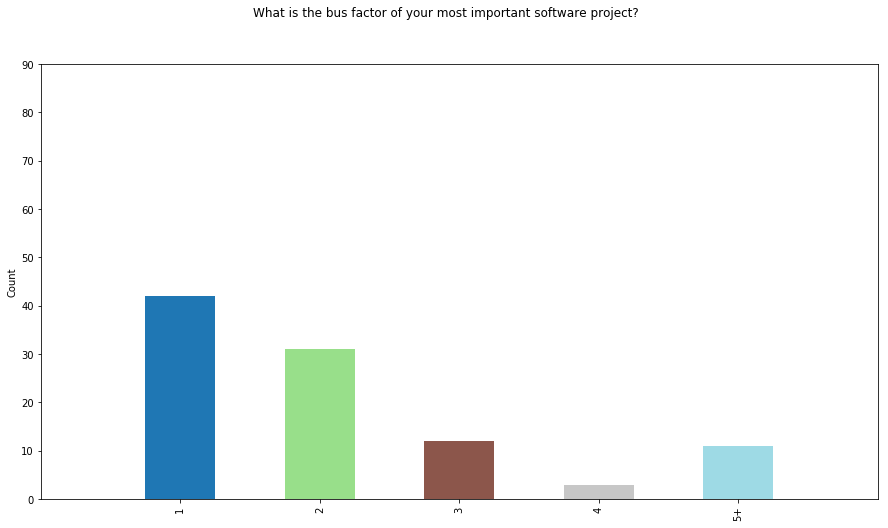

In [122]:
_ = get_plot(perc_to_count, "likert")

### Is there a technical hand-over plan for your most important software project?

In [123]:
v_to_count, filename  = get_count(df, ['stability2. Is there a technical handover plan for your most important software project?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [124]:
perc_to_count = get_percentage(v_to_count, filename)

In [125]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Is there a technical handover plan for your mos...           61         173   

                                                    NaN value  \
Is there a technical handover plan for your mos...         19   

                                                    Yes [Percentage]  \
Is there a technical handover plan for your mos...              26.0   

                                                    No [Percentage]  
Is there a technical handover plan for your mos...             74.0

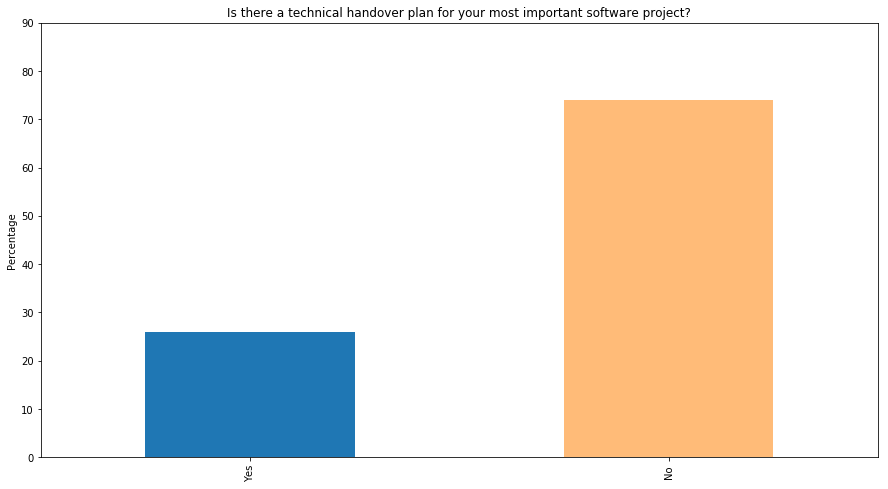

In [126]:
_ = get_plot(perc_to_count, "y/n/na")

## Group of question: open

### Have you ever released your software under an open-source licence?

In [127]:
v_to_count, filename  = get_count(df, ['open01can. Have you ever released your software under an open-source licence?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [128]:
perc_to_count = get_percentage(v_to_count, filename)

In [129]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever released your software under an o...          158          76   

                                                    NaN value  \
Have you ever released your software under an o...         19   

                                                    Yes [Percentage]  \
Have you ever released your software under an o...              68.0   

                                                    No [Percentage]  
Have you ever released your software under an o...             32.0

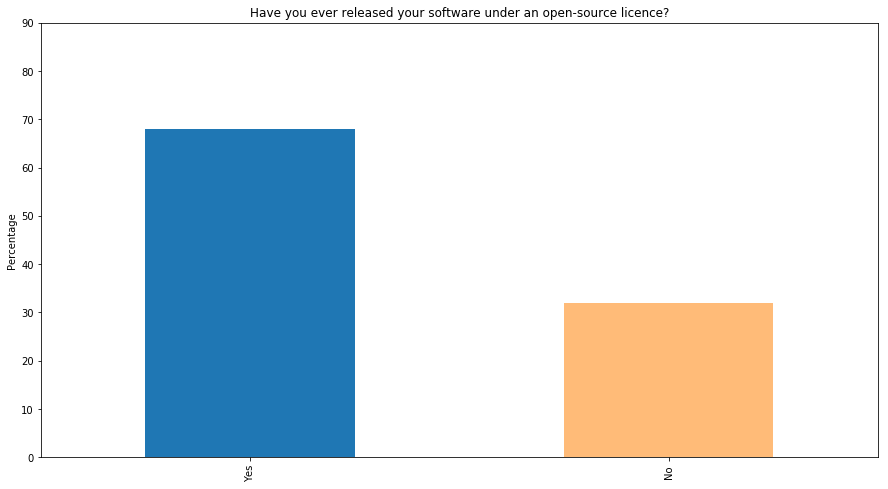

In [130]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you release the software projects you've worked on under an open-source licence?

In [131]:
v_to_count, filename  = get_count(df, ["open1can[A5]. How often do you release the software projects you've worked on under an open-source licence? []"], "likert", "./../survey_creation/2017/uk/listAnswers/likert_time_5.csv", "False", "./2017/uk/output/")

In [132]:
display(v_to_count) 

Never  Sometimes  Often  \
How often do you release the software projects ...    NaN       40.0   23.0   

                                                    Very Often  Always  
How often do you release the software projects ...        43.0    48.0

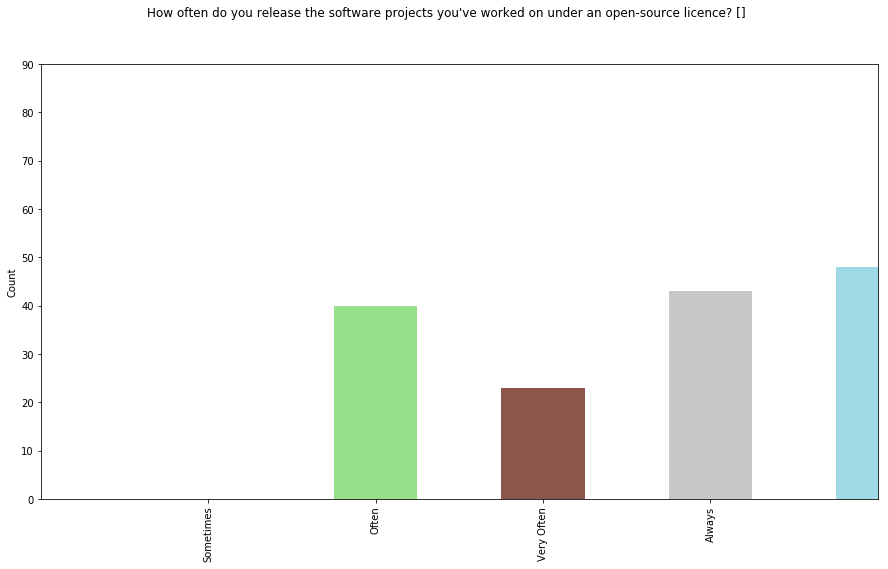

In [133]:
_ = get_plot(v_to_count, "likert")

### Have you ever used a Digital Object Identifier (DOI) to identify your software?

In [134]:
v_to_count, filename  = get_count(df, ['open03can. Have you ever used a Digital Object Identifier (DOI) to identify your software?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [135]:
perc_to_count = get_percentage(v_to_count, filename)

In [136]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever used a Digital Object Identifier ...           52         182   

                                                    NaN value  \
Have you ever used a Digital Object Identifier ...         20   

                                                    Yes [Percentage]  \
Have you ever used a Digital Object Identifier ...              22.0   

                                                    No [Percentage]  
Have you ever used a Digital Object Identifier ...             78.0

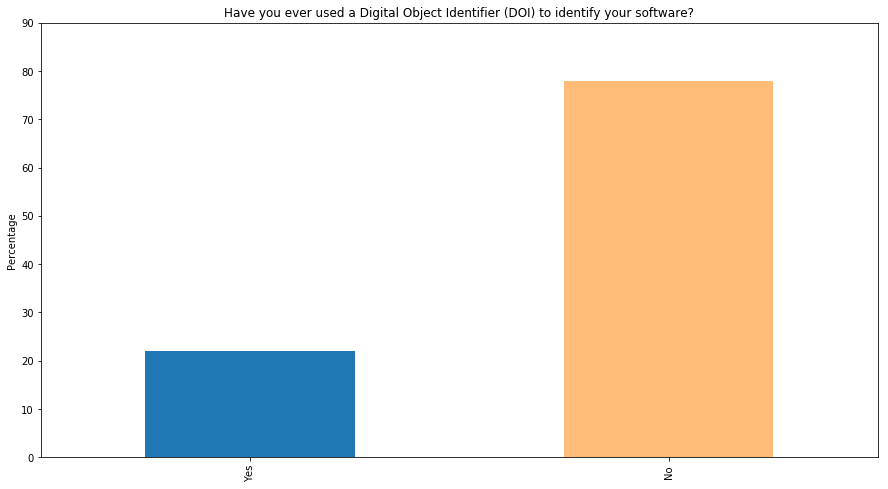

In [137]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you associate your software with a Digital Object Identifier (DOI)?

In [138]:
v_to_count, filename  = get_count(df, ['open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_time_5.csv", "False", "./2017/uk/output/")

In [139]:
display(v_to_count) 

Never  Sometimes  Often  \
How often do you associate your software with a...    NaN       30.0    8.0   

                                                    Very Often  Always  
How often do you associate your software with a...         5.0     9.0

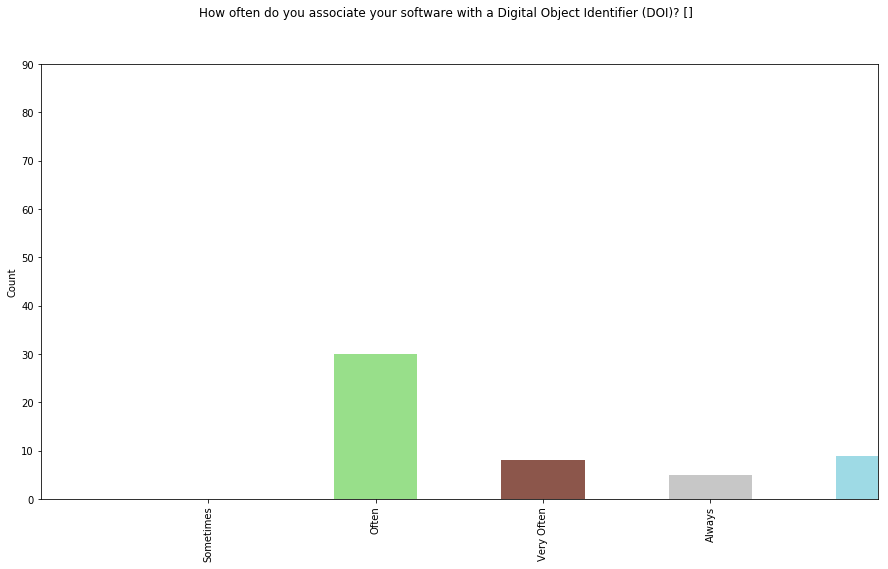

In [140]:
_ = get_plot(v_to_count, "likert")

## Group of question: train

### Have you ever trained researchers in computational techniques?

In [141]:
v_to_count, filename  = get_count(df, ['train1. Have you ever trained researchers in computational techniques?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [142]:
perc_to_count = get_percentage(v_to_count, filename)

In [143]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Have you ever trained researchers in computatio...          152          82   

                                                    NaN value  \
Have you ever trained researchers in computatio...         20   

                                                    Yes [Percentage]  \
Have you ever trained researchers in computatio...              65.0   

                                                    No [Percentage]  
Have you ever trained researchers in computatio...             35.0

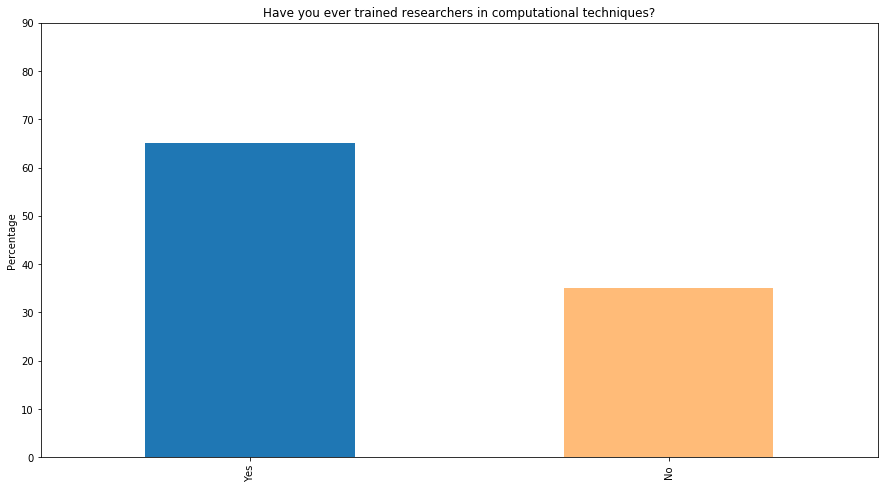

In [144]:
_ = get_plot(perc_to_count, "y/n/na")

### On average, how many times a year do you take part in providing training?

In [145]:
v_to_count, filename  = get_count(df, ['train2. On average, how many times a year do you take part in providing training?'], "freenumeric", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

       On average, how many times a year do you take part in providing training?
count                                         146.000000                        
mean                                            3.431507                        
std                                             4.071613                        
min                                             0.000000                        
25%                                             2.000000                        
50%                                             2.000000                        
75%                                             4.000000                        
max                                            30.000000                        


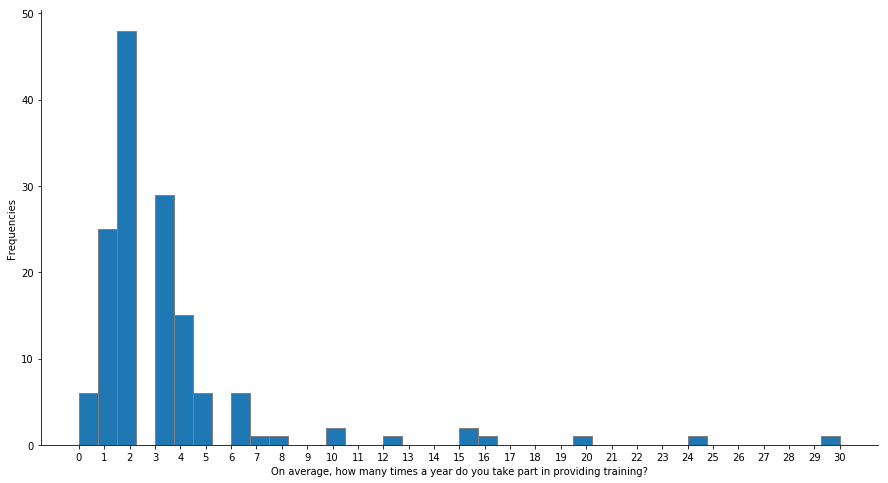

In [146]:
_ = get_plot(v_to_count, "freenumeric")

### What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)

In [147]:
 wc = wordcloud(df, ['train3. What training programs are you involved with (comma separated list)?'])

(-0.5, 1499.5, 799.5, -0.5)

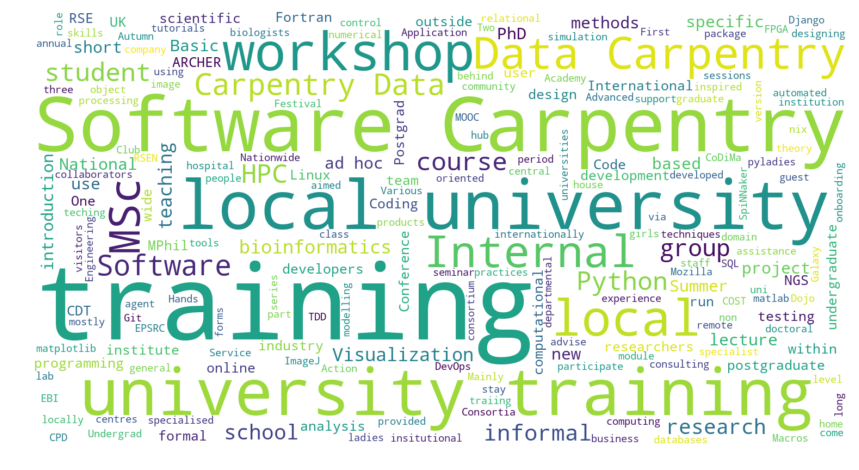

In [148]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

## Group of question: fund

### Do you know the source of the funding used to support you and your current, largest project?

In [149]:
v_to_count, filename  = get_count(df, ['fund1. Do you know the source of the funding used to support you and your current, largest project?'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [150]:
perc_to_count = get_percentage(v_to_count, filename)

In [151]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Do you know the source of the funding used to s...          199          23   

                                                    NaN value  \
Do you know the source of the funding used to s...         32   

                                                    Yes [Percentage]  \
Do you know the source of the funding used to s...              90.0   

                                                    No [Percentage]  
Do you know the source of the funding used to s...             10.0

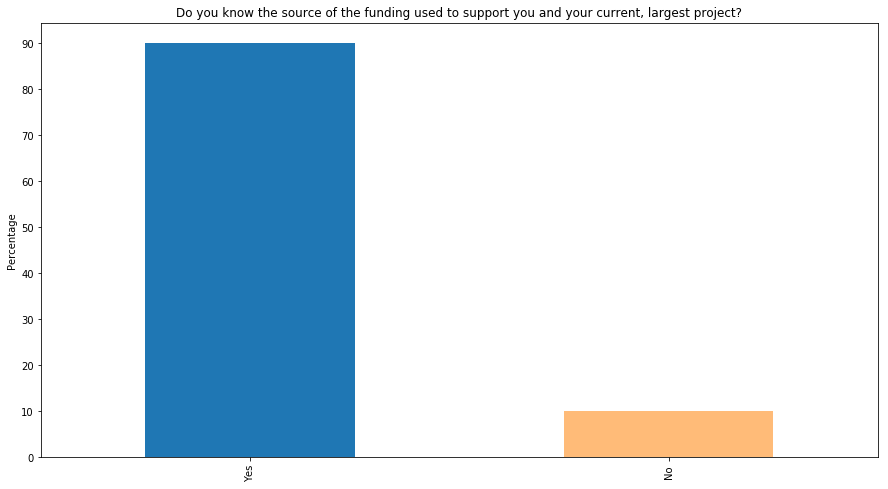

In [152]:
_ = get_plot(perc_to_count, "y/n/na")

### Which of the following sources are used to pay for your effort as an RSE/equivalent?

In [153]:
v_to_count, filename  = get_count(df, ['fund2[SQ001]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [I volunteer my time]', 'fund2[SQ002]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Donation button]', 'fund2[SQ003]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (one-time)]', 'fund2[SQ004]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Crowdfunding (recurring)]', 'fund2[SQ005]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Books & merchandise]', 'fund2[SQ006]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Advertising & sponsorships]', 'fund2[SQ007]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Industry support]', 'fund2[SQ008]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Consulting & services]', 'fund2[SQ009]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Grants]', 'fund2[SQ010]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [SaaS]', 'fund2[SQ011]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Membership]', 'fund2[SQ012]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Dual license]', 'fund2[SQ013]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Open core]', 'fund2[SQ014]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Foundations & consortiums]', 'fund2[SQ015]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Venture capital]', 'fund2[SQ016]. Which of the following sources are used to pay for your effort as an RSE/equivalent? [Trademark licensing & franchising]'], "multiple choices", "./../survey_creation/2017/uk/listAnswers/funding.csv", "False", "./2017/uk/output/")

In [154]:
perc_to_count = get_percentage(v_to_count, filename)

In [155]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                    
Grants                               163        61.0
Industry support                      33        12.0
I volunteer my time                   27        10.0
Consulting & services                 17         6.0
Open core                              7         3.0
Foundations & consortiums              6         2.0
Trademark licensing & franchising      3         1.0
SaaS                                   2         1.0
Membership                             2         1.0
Dual license                           2         1.0
Crowdfunding (one-time)                1         0.0
Books & merchandise                    1         0.0
Advertising & sponsorships             1         0.0
Venture capital                        1         0.0
Donation button                        0         0.0
Crowdfunding (recurring)               0         0.0

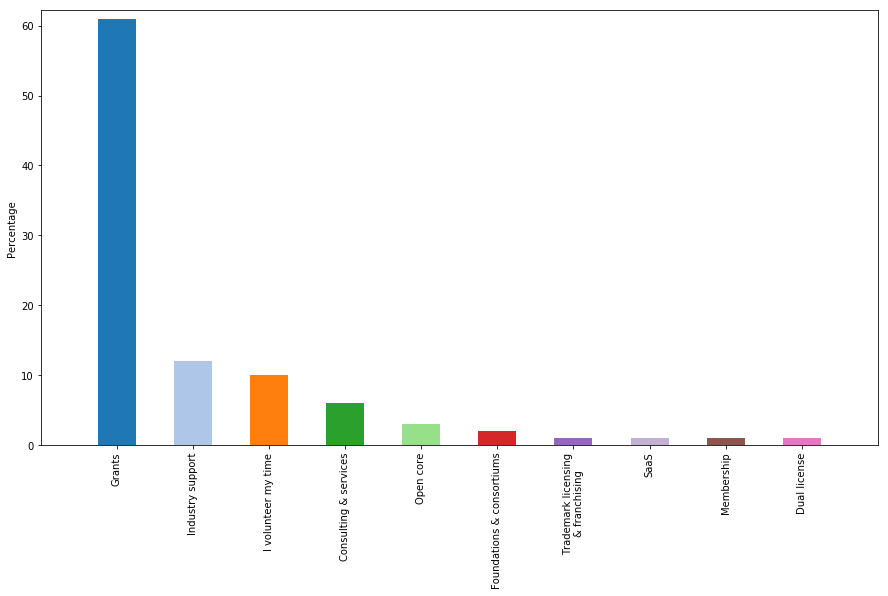

In [156]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources are used to fund your current, largest project?

In [157]:
v_to_count, filename  = get_count(df, ['fund3[SQ001]. Which of the following sources are used to fund your current, largest project? [Volunteers]', 'fund3[SQ002]. Which of the following sources are used to fund your current, largest project? [Donation button]', 'fund3[SQ003]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (one-time)]', 'fund3[SQ004]. Which of the following sources are used to fund your current, largest project? [Crowdfunding (recurring)]', 'fund3[SQ005]. Which of the following sources are used to fund your current, largest project? [Books & merchandise]', 'fund3[SQ006]. Which of the following sources are used to fund your current, largest project? [Advertising & sponsorships]', 'fund3[SQ007]. Which of the following sources are used to fund your current, largest project? [Industry support]', 'fund3[SQ008]. Which of the following sources are used to fund your current, largest project? [Consulting & services]', 'fund3[SQ009]. Which of the following sources are used to fund your current, largest project? [Grants]', 'fund3[SQ010]. Which of the following sources are used to fund your current, largest project? [SaaS]', 'fund3[SQ011]. Which of the following sources are used to fund your current, largest project? [Membership]', 'fund3[SQ012]. Which of the following sources are used to fund your current, largest project? [Dual license]', 'fund3[SQ013]. Which of the following sources are used to fund your current, largest project? [Open core]', 'fund3[SQ014]. Which of the following sources are used to fund your current, largest project? [Foundations & consortiums]', 'fund3[SQ015]. Which of the following sources are used to fund your current, largest project? [Venture capital]', 'fund3[SQ016]. Which of the following sources are used to fund your current, largest project? [Trademark licensing & franchising]'], "multiple choices", "./../survey_creation/2017/uk/listAnswers/funding.csv", "False", "./2017/uk/output/")

In [158]:
perc_to_count = get_percentage(v_to_count, filename)

In [159]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                    
Grants                               157        69.0
Industry support                      30        13.0
Volunteers                            15         7.0
Consulting & services                  8         4.0
Foundations & consortiums              5         2.0
Membership                             2         1.0
Dual license                           2         1.0
Open core                              2         1.0
Trademark licensing & franchising      2         1.0
Donation button                        1         0.0
Crowdfunding (one-time)                1         0.0
SaaS                                   1         0.0
Venture capital                        1         0.0
Crowdfunding (recurring)               0         0.0
Books & merchandise                    0         0.0
Advertising & sponsorships             0         0.0

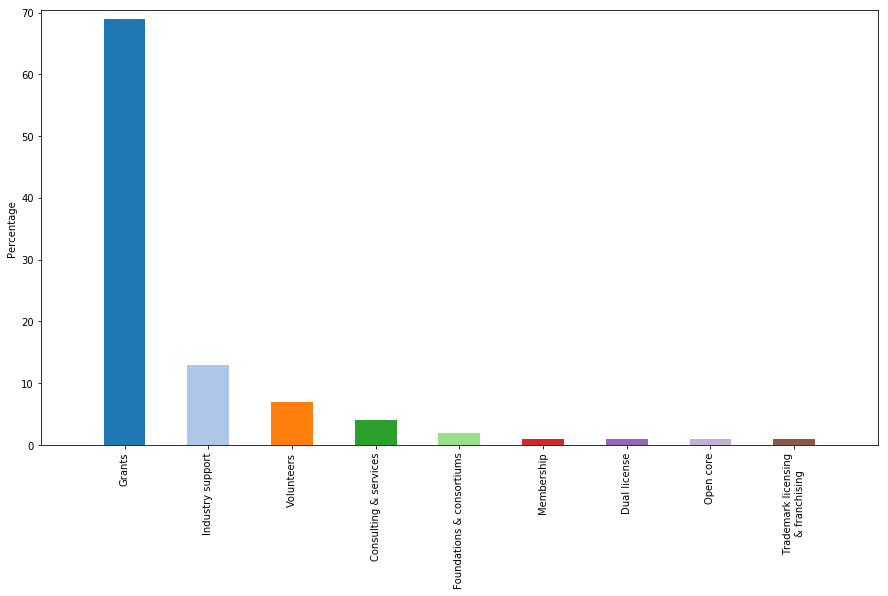

In [160]:
_ = get_plot(perc_to_count, "multiple choices")

### Which of the following sources were used to fund your current, largest project three years ago?

In [161]:
v_to_count, filename  = get_count(df, ['fund4[SQ017]. Which of the following sources were used to fund your current, largest project three years ago? [My previous project is less than 3 years old]', 'fund4[SQ001]. Which of the following sources were used to fund your current, largest project three years ago? [Volunteers]', 'fund4[SQ002]. Which of the following sources were used to fund your current, largest project three years ago? [Donation button]', 'fund4[SQ003]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (one-time)]', 'fund4[SQ004]. Which of the following sources were used to fund your current, largest project three years ago? [Crowdfunding (recurring)]', 'fund4[SQ005]. Which of the following sources were used to fund your current, largest project three years ago? [Books & merchandise]', 'fund4[SQ006]. Which of the following sources were used to fund your current, largest project three years ago? [Advertising & sponsorships]', 'fund4[SQ007]. Which of the following sources were used to fund your current, largest project three years ago? [Industry support]', 'fund4[SQ008]. Which of the following sources were used to fund your current, largest project three years ago? [Consulting & services]', 'fund4[SQ009]. Which of the following sources were used to fund your current, largest project three years ago? [Grants]', 'fund4[SQ010]. Which of the following sources were used to fund your current, largest project three years ago? [SaaS]', 'fund4[SQ011]. Which of the following sources were used to fund your current, largest project three years ago? [Membership]', 'fund4[SQ012]. Which of the following sources were used to fund your current, largest project three years ago? [Dual license]', 'fund4[SQ013]. Which of the following sources were used to fund your current, largest project three years ago? [Open core]', 'fund4[SQ014]. Which of the following sources were used to fund your current, largest project three years ago? [Foundations & consortiums]', 'fund4[SQ015]. Which of the following sources were used to fund your current, largest project three years ago? [Venture capital]', 'fund4[SQ016]. Which of the following sources were used to fund your current, largest project three years ago? [Trademark licensing & franchising]'], "multiple choices", "./../survey_creation/2017/uk/listAnswers/funding.csv", "False", "./2017/uk/output/")

In [162]:
perc_to_count = get_percentage(v_to_count, filename)

In [163]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                               
Grants                                          127        64.0
My previous project is less than 3 years old     24        12.0
Industry support                                 23        12.0
Volunteers                                       10         5.0
Consulting & services                             6         3.0
Dual license                                      2         1.0
Open core                                         2         1.0
Advertising & sponsorships                        1         0.0
SaaS                                              1         0.0
Foundations & consortiums                         1         0.0
Venture capital                                   1         0.0
Trademark licensing & franchising                 1         0.0
Books & merchandise                               0         0.0
Crowdfunding (recurring)                          0         0.0
Crowdfunding (one-time)                           0         0.0
Donation button                                   0         0.0
Membership                                        0         0.0

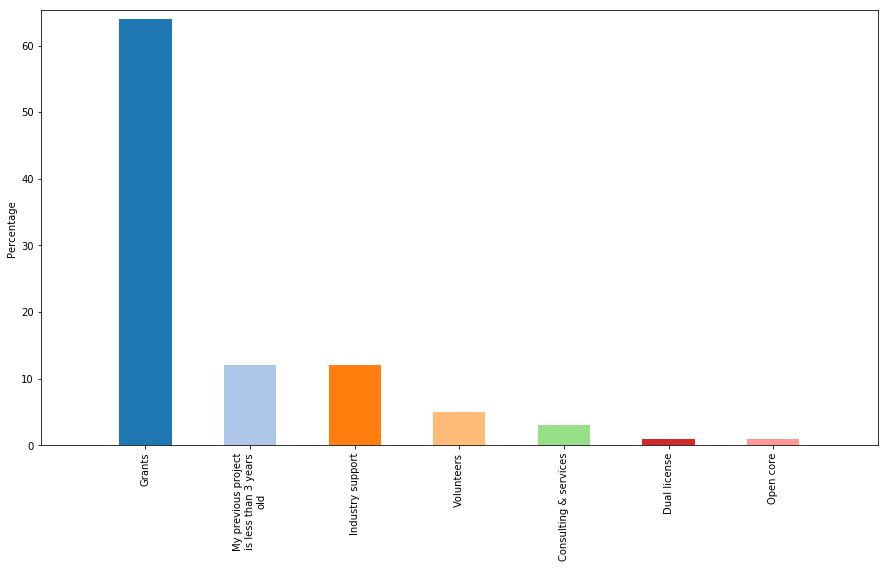

In [164]:
_ = get_plot(perc_to_count, "multiple choices")

# Section: 5

## Group of question: perfCheck

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?; In your work, do you have access to sufficient data and information?; Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [165]:
v_to_count, filename  = get_count(df, ['likerttime1[perfCheck1]. Please rate the following propositions. There are no right or wrong answers [Do you receive sufficient information on the results of your work?]', 'likerttime1[perfCheck2]. Please rate the following propositions. There are no right or wrong answers [Do you get the opportunity to check on how well you are doing your work?]', 'likerttime1[perfCheck3]. Please rate the following propositions. There are no right or wrong answers [Do you have access to sufficient data and information to do your work?]', 'likertime2[perfCheck4]. Please rate the following propositions. There are no right or wrong answers [Do you receive sufficient information on the purpose of your work?]', 'likertime2[perfCheck5]. Please rate the following propositions. There are no right or wrong answers [Does your work provide you with direct feedback on how well you are doing?]', 'likertime2[perfCheck6]. Please rate the following propositions. There are no right or wrong answers [Does your supervisor/line manager inform you about how well you are doing your work?]', 'likerttime1[perfCheck7]. Please rate the following propositions. There are no right or wrong answers [Do your colleagues inform you about how well you are doing your work?]'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_time_5.csv", "False", "./2017/uk/output/")

In [166]:
display(v_to_count) 

Never  Sometimes  Often  \
Do you receive sufficient information on the re...      5         74     62   
Do you get the opportunity to check on how well...     17         90     68   
Do you have access to sufficient data and infor...      1         44     62   
Do you receive sufficient information on the pu...      6         38     73   
Does your work provide you with direct feedback...     15        115     41   
Does your supervisor/line manager inform you ab...     13         97     53   
Do your colleagues inform you about how well yo...     20        110     48   

                                                    Very Often  Always  
Do you receive sufficient information on the re...          51      21  
Do you get the opportunity to check on how well...          30       8  
Do you have access to sufficient data and infor...          75      40  
Do you receive sufficient information on the pu...          50      47  
Does your work provide you with direct feedback...          29      13  
Does your supervisor/line manager inform you ab...          28      16  
Do your colleagues inform you about how well yo...          32       7

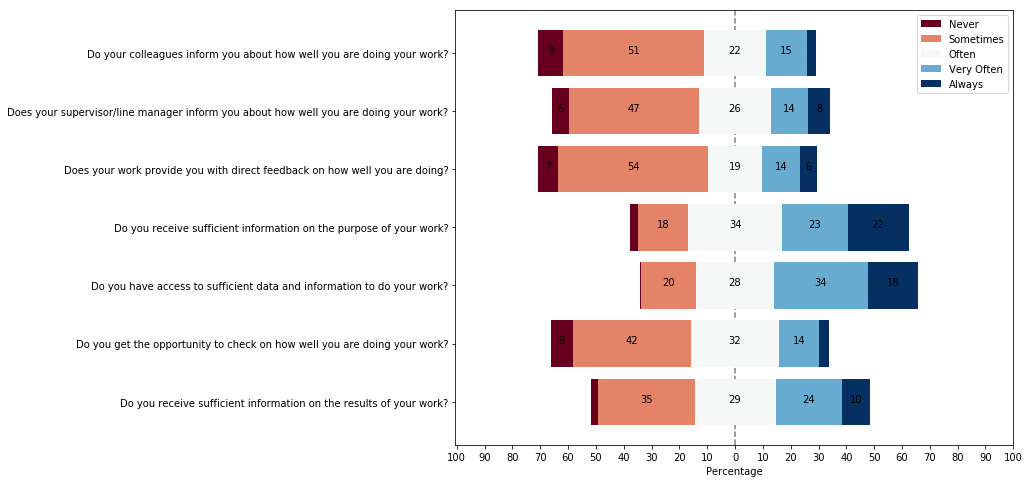

In [167]:
_ = get_plot(v_to_count, "likert")

## Group of question: turnOver

### How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?; How often do you look forward to another day at work?; How often do you consider leaving your job?; How often do dream about getting another job that will better suit your needs?

In [168]:
v_to_count, filename  = get_count(df, ['likertime2[turnOver1]. Please rate the following propositions. There are no right or wrong answers [How often do you feel frustrated when not given the opportunity to achieve your personal work-related goals?]', 'likertime2[turnOver2]. Please rate the following propositions. There are no right or wrong answers [How often do you look forward to another day at work?]', 'likerttime1[turnOver3]. Please rate the following propositions. There are no right or wrong answers [How often do you consider leaving your job?]', 'likerttime1[turnOver4]. Please rate the following propositions. There are no right or wrong answers [How often do you dream about getting another job that will better suit your needs?]'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_time_5.csv", "False", "./2017/uk/output/")

In [169]:
display(v_to_count) 

Never  Sometimes  Often  \
How often do you feel frustrated when not given...   32.0       98.0   41.0   
How often do you look forward to another day at...   26.0      115.0   74.0   
How often do you consider leaving your job?          54.0      135.0   30.0   
How often do you dream about getting another jo...   43.0       99.0   23.0   

                                                    Very Often  Always  
How often do you feel frustrated when not given...        24.0    12.0  
How often do you look forward to another day at...         NaN     NaN  
How often do you consider leaving your job?                NaN     NaN  
How often do you dream about getting another jo...        34.0    19.0

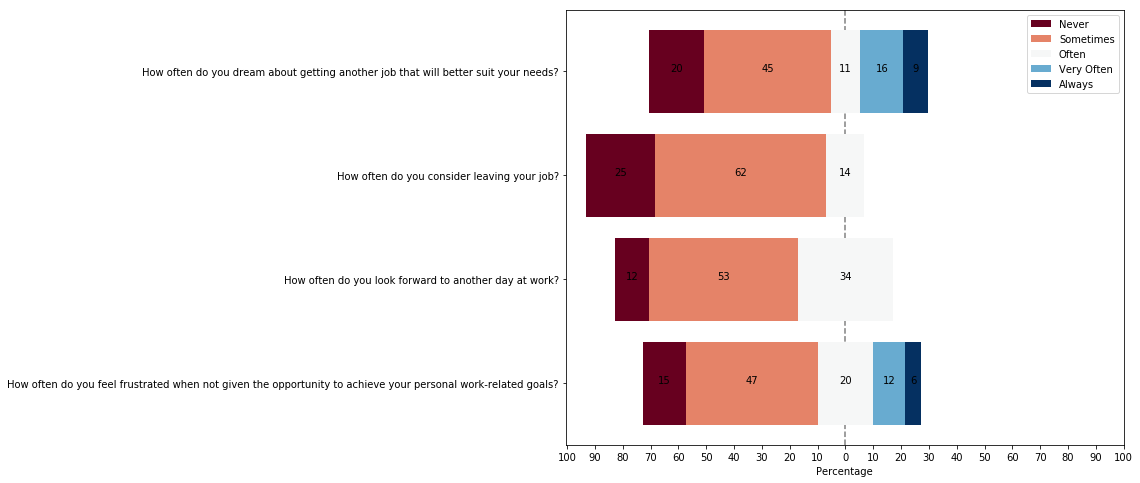

In [170]:
_ = get_plot(v_to_count, "likert")

### My current job satisfies my personal needs; I would accept another job at the same compensation level if I was offered it

In [171]:
v_to_count, filename  = get_count(df, ['likertagree1[turnOver5]. Please rate the following propositions. There are no right or wrong answers [My current job satisfies my personal needs]', 'likertagree3[turnOver6]. Please rate the following propositions. There are no right or wrong answers [I would accept another job at the same compensation level if I was offered it]'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_agree.csv", "False", "./2017/uk/output/")

In [172]:
display(v_to_count) 

Strongly disagree  \
My current job satisfies my personal needs                          9   
I would accept another job at the same compensa...                 27   

                                                    Disagree  \
My current job satisfies my personal needs                26   
I would accept another job at the same compensa...        64   

                                                    Neither agree or disagree  \
My current job satisfies my personal needs                                 36   
I would accept another job at the same compensa...                         72   

                                                    Agree  Strongly Agree  
My current job satisfies my personal needs            113              37  
I would accept another job at the same compensa...     33              13

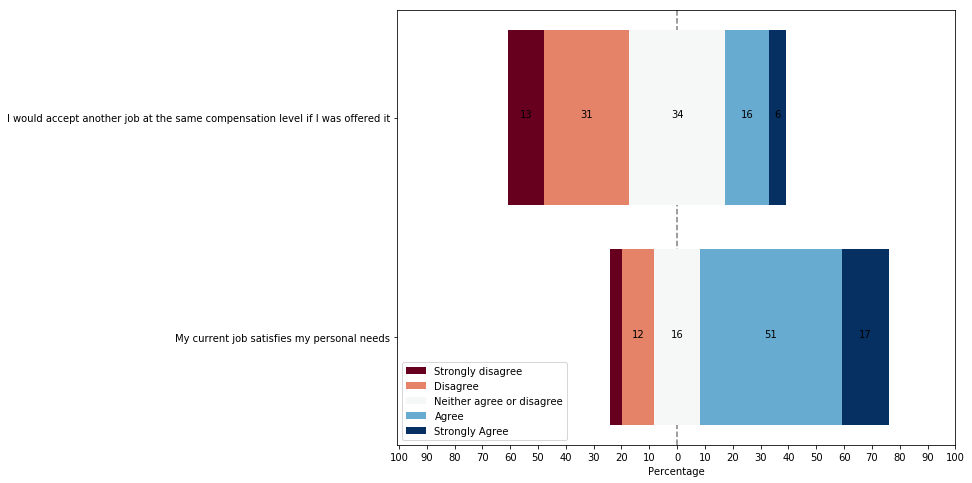

In [173]:
_ = get_plot(v_to_count, "likert")

## Group of question: affRec

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with a word of thanks from my supervisor/line manager; I am satisfied with the recognition I receive from my supervisor/line manager for doing my job; I am satisfied with the compliments from my supervisor/line manager concerning my work; I am satisfied with the encouragement from my supervisor/line manager while doing my job

In [174]:
v_to_count, filename  = get_count(df, ["likertagree3[affRec1]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with my supervisor/line manager's confidence in me]", 'likertagree2[affRec2]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with a word of thanks from my supervisor/line manager]', 'likertagree2[affRec3]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with the recognition I receive from my supervisor/line manager for doing my job]', 'likertagree1[affRec4]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with the compliments from my supervisor/line manager concerning my work]', 'likertagree3[affRec5]. Please rate the following propositions. There are no right or wrong answers [I am satisfied with the encouragement from my supervisor/line manager while doing my job]'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_agree.csv", "False", "./2017/uk/output/")

In [175]:
display(v_to_count) 

Strongly disagree  \
I am satisfied with my supervisor/line manager'...                  6   
I am satisfied with a word of thanks from my su...                  8   
I am satisfied with the recognition I receive f...                  9   
I am satisfied with the compliments from my sup...                  8   
I am satisfied with the encouragement from my s...                  9   

                                                    Disagree  \
I am satisfied with my supervisor/line manager'...        13   
I am satisfied with a word of thanks from my su...        22   
I am satisfied with the recognition I receive f...        31   
I am satisfied with the compliments from my sup...        37   
I am satisfied with the encouragement from my s...        33   

                                                    Neither agree or disagree  \
I am satisfied with my supervisor/line manager'...                         30   
I am satisfied with a word of thanks from my su...                         58   
I am satisfied with the recognition I receive f...                         37   
I am satisfied with the compliments from my sup...                         43   
I am satisfied with the encouragement from my s...                         46   

                                                    Agree  Strongly Agree  
I am satisfied with my supervisor/line manager'...    105              56  
I am satisfied with a word of thanks from my su...     89              37  
I am satisfied with the recognition I receive f...     90              51  
I am satisfied with the compliments from my sup...    101              19  
I am satisfied with the encouragement from my s...     87              34

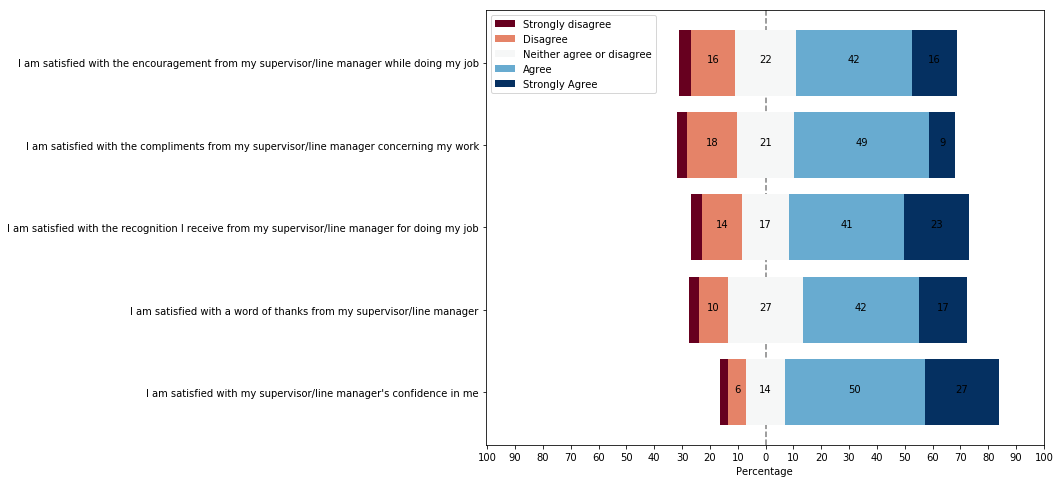

In [176]:
_ = get_plot(v_to_count, "likert")

## Group of question: percEmp

### It would not be very difficult for me to get an equivalent job in a different organisation; I can think of a number of organisations that would probably offer me a job; My experience is in demand on the labour market; Given my qualifications and experience, getting a new job would not be very hard at all

In [177]:
v_to_count, filename  = get_count(df, ['likertagree1[percEmp1]. Please rate the following propositions. There are no right or wrong answers [It would not be very difficult for me to get an equivalent job in a different organisation]', 'likertagree2[percEmp2]. Please rate the following propositions. There are no right or wrong answers [I can think of a number of organisations that would probably offer me a job]', 'likertagree1[percEmp3]. Please rate the following propositions. There are no right or wrong answers [My experience is in demand on the labour market]', 'likertagree3[percEmp4]. Please rate the following propositions. There are no right or wrong answers [Given my qualifications and experience, getting a new job would not be very hard at all]'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_agree.csv", "False", "./2017/uk/output/")

In [178]:
display(v_to_count) 

Strongly disagree  \
It would not be very difficult for me to get an...                 11   
I can think of a number of organisations that w...                  2   
My experience is in demand on the labour market                     3   
Given my qualifications and experience, getting...                  8   

                                                    Disagree  \
It would not be very difficult for me to get an...        39   
I can think of a number of organisations that w...        14   
My experience is in demand on the labour market           13   
Given my qualifications and experience, getting...        20   

                                                    Neither agree or disagree  \
It would not be very difficult for me to get an...                         64   
I can think of a number of organisations that w...                         35   
My experience is in demand on the labour market                            37   
Given my qualifications and experience, getting...                         66   

                                                    Agree  Strongly Agree  
It would not be very difficult for me to get an...     61              36  
I can think of a number of organisations that w...    101              69  
My experience is in demand on the labour market       101              60  
Given my qualifications and experience, getting...     75              44

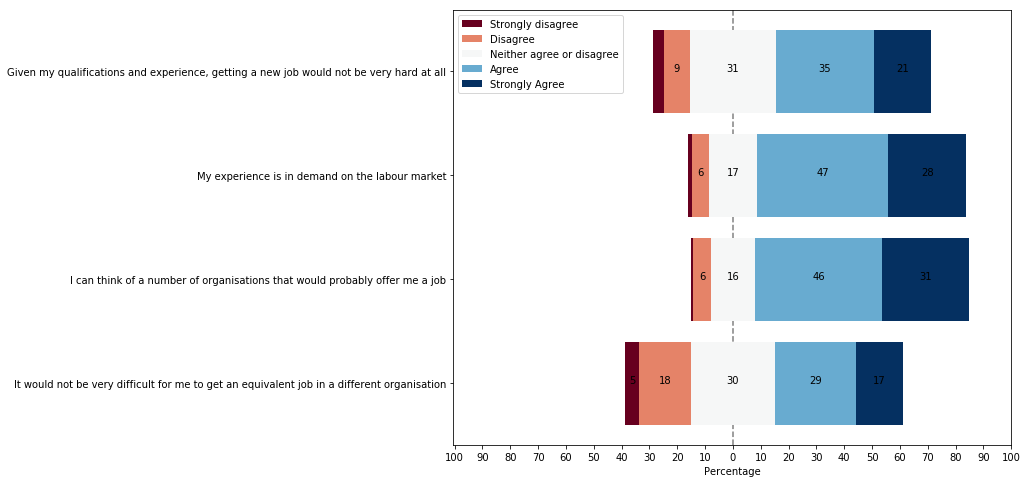

In [179]:
_ = get_plot(v_to_count, "likert")

## Group of question: affSat

### I find real enjoyment in my job; Most days I am enthusiastic about my job; I feel fairly well satisfied with my job; I like my job better than the average person

In [180]:
v_to_count, filename  = get_count(df, ['likertagree2[affSat1]. Please rate the following propositions. There are no right or wrong answers [I find real enjoyment in my job]', 'likertagree2[affSat2]. Please rate the following propositions. There are no right or wrong answers [Most days I am enthusiastic about my job]', 'likertagree1[affSat3]. Please rate the following propositions. There are no right or wrong answers [I feel satisfied with my job]', 'likertagree3[affSat4]. Please rate the following propositions. There are no right or wrong answers [I like my job more than average]'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_agree.csv", "False", "./2017/uk/output/")

In [181]:
display(v_to_count) 

Strongly disagree  Disagree  \
I find real enjoyment in my job                           4        10   
Most days I am enthusiastic about my job                  5        16   
I feel satisfied with my job                              9        26   
I like my job more than average                           7        10   

                                          Neither agree or disagree  Agree  \
I find real enjoyment in my job                                  20     95   
Most days I am enthusiastic about my job                         37    115   
I feel satisfied with my job                                     40    111   
I like my job more than average                                  41    101   

                                          Strongly Agree  
I find real enjoyment in my job                       96  
Most days I am enthusiastic about my job              50  
I feel satisfied with my job                          29  
I like my job more than average                       55

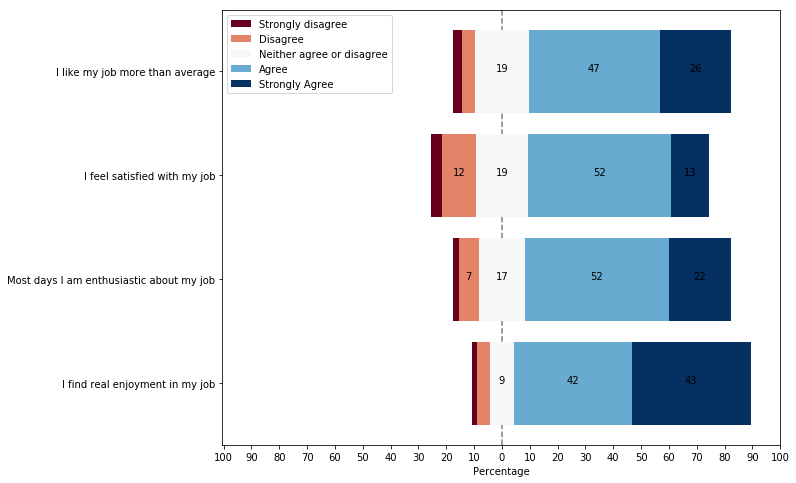

In [182]:
_ = get_plot(v_to_count, "likert")

## Group of question: satisGen

### In general, how satisfied are you with Your current position

In [183]:
v_to_count, filename  = get_count(df, ['satisGen1[SQ001]. In general, how satisfied are you with: [Your current position]', 'satisGen1[SQ002]. In general, how satisfied are you with: [Your career]'], "likert", "./../survey_creation/2017/uk/listAnswers/likert_satisfied_10.csv", "False", "./2017/uk/output/")

In [184]:
display(v_to_count) 

0 - Not at all satisfied  1  2   3   4   5   6   7   8  \
Your current position                         7  4  6   4  12  18  32  61  44   
Your career                                   4  4  7  14  19  23  37  55  41   

                        9  10 - Completely satisfied  
Your current position  26                          5  
Your career            12                          4

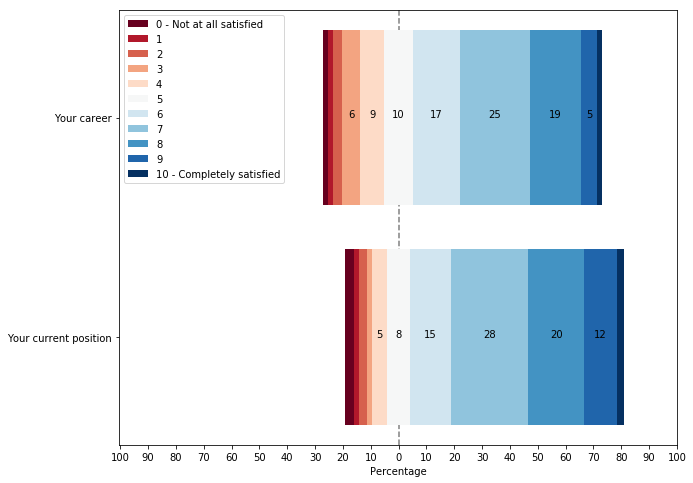

In [185]:
_ = get_plot(v_to_count, "likert")

# Section: 6

## Group of question: socio

# Section: 7

## Group of question: tool

### What Operating System do you prefer to use at work?

In [186]:
v_to_count, filename  = get_count(df, ['tool2. What Operating System do you prefer to use at work?'], "one choice", "./../survey_creation/2017/uk/listAnswers/os.csv", "False", "./2017/uk/output/")

In [187]:
perc_to_count = get_percentage(v_to_count, filename)

In [188]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
What Operating System do you prefer to use at w...                   
GNU/Linux                                             135        61.0
OS X                                                   51        23.0
Windows                                                33        15.0
Other                                                   2         1.0
NaN                                                    33         NaN

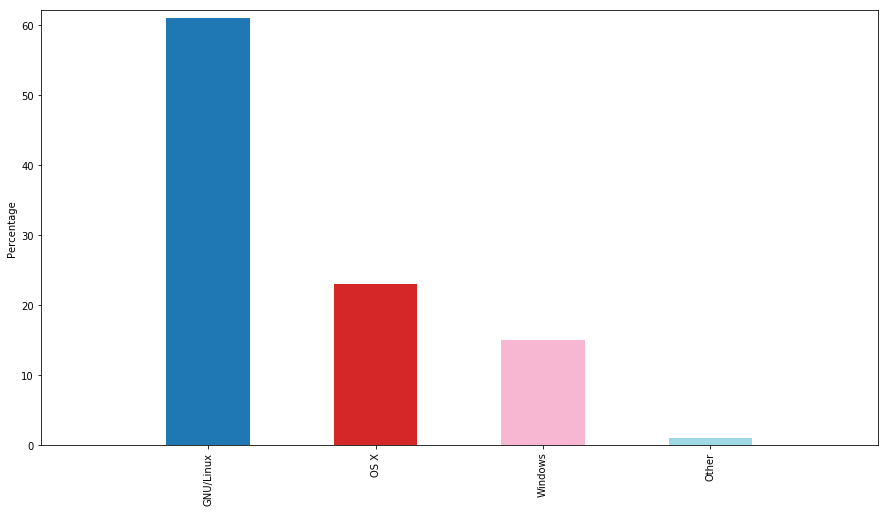

In [189]:
_ = get_plot(perc_to_count, "one choice")

### What programming languages do you use at work? (Select as many as apply)

In [190]:
v_to_count, filename  = get_count(df, ['tool4can[SQ001]. What programming languages do you use at work? (Select as many as apply) [Assembly]', 'tool4can[SQ002]. What programming languages do you use at work? (Select as many as apply) [C]', 'tool4can[SQ003]. What programming languages do you use at work? (Select as many as apply) [C#]', 'tool4can[SQ004]. What programming languages do you use at work? (Select as many as apply) [C++]', 'tool4can[SQ005]. What programming languages do you use at work? (Select as many as apply) [Clojure]', 'tool4can[SQ006]. What programming languages do you use at work? (Select as many as apply) [CoffeeScript]', 'tool4can[SQ007]. What programming languages do you use at work? (Select as many as apply) [Common Lisp]', 'tool4can[SQ036]. What programming languages do you use at work? (Select as many as apply) [CUDA]', 'tool4can[SQ008]. What programming languages do you use at work? (Select as many as apply) [Dart]', 'tool4can[SQ009]. What programming languages do you use at work? (Select as many as apply) [Elixir]', 'tool4can[SQ010]. What programming languages do you use at work? (Select as many as apply) [Erlang]', 'tool4can[SQ011]. What programming languages do you use at work? (Select as many as apply) [F#]', 'tool4can[SQ037]. What programming languages do you use at work? (Select as many as apply) [FORTRAN]', 'tool4can[SQ012]. What programming languages do you use at work? (Select as many as apply) [Go]', 'tool4can[SQ013]. What programming languages do you use at work? (Select as many as apply) [Groovy]', 'tool4can[SQ014]. What programming languages do you use at work? (Select as many as apply) [Hack]', 'tool4can[SQ015]. What programming languages do you use at work? (Select as many as apply) [Haskell]', 'tool4can[SQ016]. What programming languages do you use at work? (Select as many as apply) [Java]', 'tool4can[SQ017]. What programming languages do you use at work? (Select as many as apply) [JavaScript]', 'tool4can[SQ018]. What programming languages do you use at work? (Select as many as apply) [Julia]', 'tool4can[SQ019]. What programming languages do you use at work? (Select as many as apply) [Lua]', 'tool4can[SQ038]. What programming languages do you use at work? (Select as many as apply) [Markup languages (HTML, markdown,...)]', 'tool4can[SQ020]. What programming languages do you use at work? (Select as many as apply) [Matlab]', 'tool4can[SQ021]. What programming languages do you use at work? (Select as many as apply) [Objective-C]', 'tool4can[SQ022]. What programming languages do you use at work? (Select as many as apply) [Perl]', 'tool4can[SQ023]. What programming languages do you use at work? (Select as many as apply) [PHP]', 'tool4can[SQ024]. What programming languages do you use at work? (Select as many as apply) [Python]', 'tool4can[SQ025]. What programming languages do you use at work? (Select as many as apply) [R]', 'tool4can[SQ026]. What programming languages do you use at work? (Select as many as apply) [Ruby]', 'tool4can[SQ027]. What programming languages do you use at work? (Select as many as apply) [Rust]', 'tool4can[SQ028]. What programming languages do you use at work? (Select as many as apply) [Scala]', 'tool4can[SQ029]. What programming languages do you use at work? (Select as many as apply) [Smalltalk]', 'tool4can[SQ030]. What programming languages do you use at work? (Select as many as apply) [SQL]', 'tool4can[SQ031]. What programming languages do you use at work? (Select as many as apply) [Swift]', 'tool4can[SQ039]. What programming languages do you use at work? (Select as many as apply) [Unix Shell Scripting]', 'tool4can[SQ032]. What programming languages do you use at work? (Select as many as apply) [TypeScript]', 'tool4can[SQ033]. What programming languages do you use at work? (Select as many as apply) [VB.NET]', 'tool4can[SQ034]. What programming languages do you use at work? (Select as many as apply) [VBA]', 'tool4can[SQ035]. What programming languages do you use at work? (Select as many as apply) [Visual Basic]'], "multiple choices", "./../survey_creation/2017/uk/listAnswers/programing_language.csv", "False", "./2017/uk/output/")

In [191]:
perc_to_count = get_percentage(v_to_count, filename)

In [192]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                                        
Python                                   189        15.0
Unix Shell Scripting                     140        11.0
Markup languages (HTML, markdown,...)    113         9.0
C++                                       94         8.0
C                                         92         7.0
JavaScript                                85         7.0
FORTRAN                                   81         6.0
SQL                                       79         6.0
Java                                      65         5.0
Matlab                                    61         5.0
R                                         57         5.0
Perl                                      41         3.0
PHP                                       31         2.0
CUDA                                      21         2.0
C#                                        19         2.0
Ruby                                      14         1.0
TypeScript                                 9         1.0
Groovy                                     7         1.0
VBA                                        7         1.0
Visual Basic                               7         1.0
Scala                                      6         0.0
Assembly                                   5         0.0
Go                                         5         0.0
Rust                                       3         0.0
F#                                         3         0.0
Elixir                                     2         0.0
CoffeeScript                               2         0.0
Objective-C                                2         0.0
Julia                                      2         0.0
Haskell                                    2         0.0
Erlang                                     1         0.0
Smalltalk                                  1         0.0
Swift                                      1         0.0
VB.NET                                     1         0.0
Clojure                                    1         0.0
Lua                                        1         0.0
Hack                                       0         0.0
Dart                                       0         0.0
Common Lisp                                0         0.0

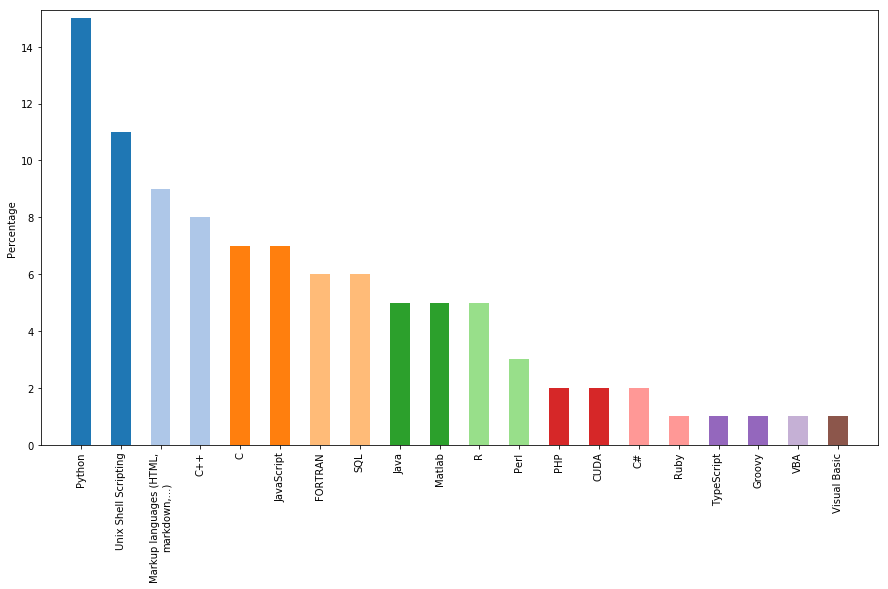

In [193]:
_ = get_plot(perc_to_count, "multiple choices")

## Group of question: ukrse

### Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list)

In [194]:
v_to_count, filename  = get_count(df, ['ukrse1. Are you a member of the UK RSE Association? (Members are people who have signed up to the UK RSE mailing list at www.rse.ac.uk)'], "y/n/na", "./../survey_creation/2017/uk/listAnswers/.csv", "False", "./2017/uk/output/")

In [195]:
perc_to_count = get_percentage(v_to_count, filename)

In [196]:
display_side_by_side(v_to_count,perc_to_count)

Yes [Count]  No [Count]  \
Are you a member of the UK RSE Association? (Me...          156          62   

                                                    NaN value  \
Are you a member of the UK RSE Association? (Me...         36   

                                                    Yes [Percentage]  \
Are you a member of the UK RSE Association? (Me...              72.0   

                                                    No [Percentage]  
Are you a member of the UK RSE Association? (Me...             28.0

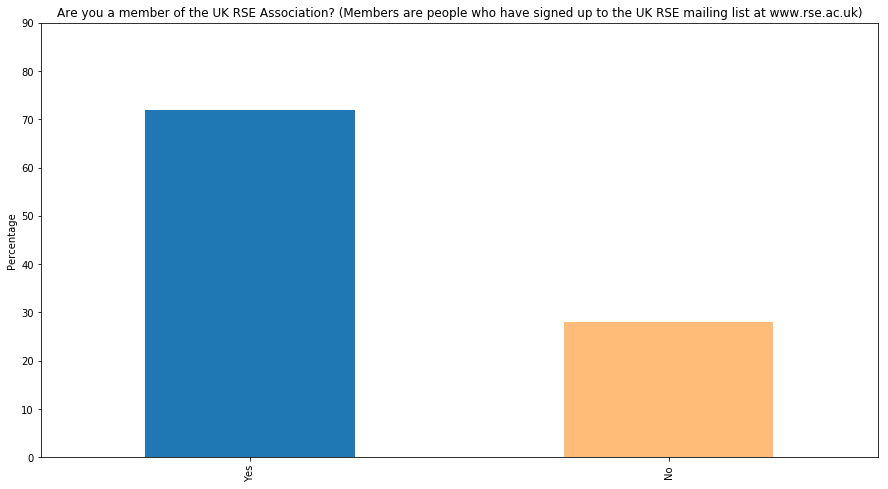

In [197]:
_ = get_plot(perc_to_count, "y/n/na")

### How do you meet other RSEs?

In [198]:
v_to_count, filename  = get_count(df, ['ukrse2[SQ001]. How do you meet other RSEs? [UK RSE Association]', 'ukrse2[SQ002]. How do you meet other RSEs? [Local RSE group/network]', 'ukrse2[SQ003]. How do you meet other RSEs? [N/A]'], "multiple choices", "./../survey_creation/2017/uk/listAnswers/ukrse.csv", "False", "./2017/uk/output/")

In [199]:
perc_to_count = get_percentage(v_to_count, filename)

In [200]:
display_side_by_side(v_to_count,perc_to_count)

Count  Percentage
                                          
N/A                        101        42.0
UK RSE Association          72        30.0
Local RSE group/network     66        28.0

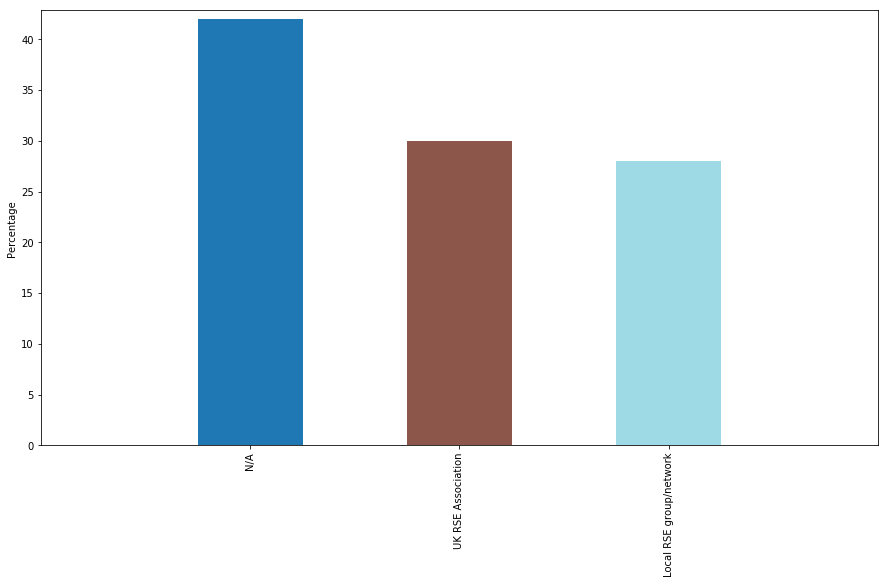

In [201]:
_ = get_plot(perc_to_count, "multiple choices")

### How did you learn the skills you need to become an RSE?

In [202]:
 wc = wordcloud(df, ['ukrse3. How did you learn the skills you need to become an RSE?'])

(-0.5, 1499.5, 799.5, -0.5)

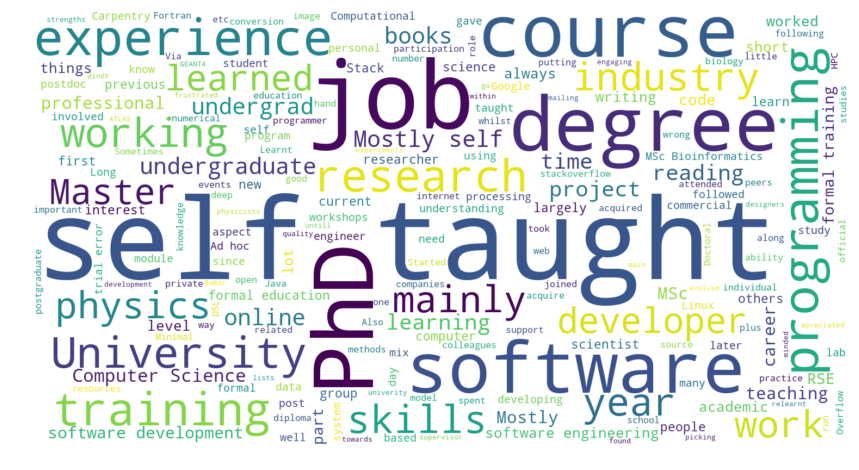

In [203]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

## Group of question: skill

### What three skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical.

In [204]:
 wc = wordcloud(df, ['skill2[SQ001]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 1]', 'skill2[SQ2]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 2]', 'skill2[SQ3]. What skills would you like to acquire or improve to help your work as a Research Software Engineer? The skills can be technical and non-technical. [Skill 3]'])

(-0.5, 1499.5, 799.5, -0.5)

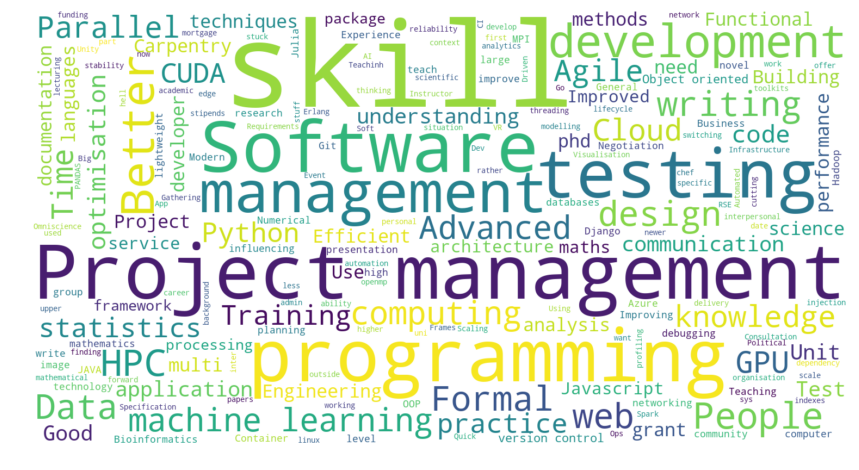

In [205]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")